# Исследование данных о российском кинопрокате



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-типов-данных-и-преобразование-их-при-необходимости" data-toc-modified-id="Проверка-типов-данных-и-преобразование-их-при-необходимости-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка типов данных и преобразование их при необходимости</a></span></li><li><span><a href="#Изучение-пропусков-в-датафрейме-и-заполнение-при-необходимости" data-toc-modified-id="Изучение-пропусков-в-датафрейме-и-заполнение-при-необходимости-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучение пропусков в датафрейме и заполнение при необходимости</a></span></li><li><span><a href="#Изучение-дубликатов-в-датафрейме.-Описание-причин,-которые-могли-повлиять-на-появление-дублей." data-toc-modified-id="Изучение-дубликатов-в-датафрейме.-Описание-причин,-которые-могли-повлиять-на-появление-дублей.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изучение дубликатов в датафрейме. Описание причин, которые могли повлиять на появление дублей.</a></span></li><li><span><a href="#Изучение-категориальных-значений" data-toc-modified-id="Изучение-категориальных-значений-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изучение категориальных значений</a></span></li><li><span><a href="#Проверка-количественных-значений-на-предмет-подозрительных-данных" data-toc-modified-id="Проверка-количественных-значений-на-предмет-подозрительных-данных-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка количественных значений на предмет подозрительных данных</a></span></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Фильмы,-которые-получили-государственную-поддержку" data-toc-modified-id="Фильмы,-которые-получили-государственную-поддержку-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Фильмы, которые получили государственную поддержку</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта 

Заказчик этого исследования — Министерство культуры Российской Федерации.

**Основные задачи**:

- изучить рынок российского кинопроката 
- выявить текущие тренды
- уделить внимание фильмам, которые получили государственную поддержку
- ответить на вопрос, насколько такие фильмы интересны зрителю

**План работы**:
- открытие и знакомство с данными
- предобработка данных
- исследовательский анализ данных
- общий вывод 

**Описание данных**:

В этом проекте будет происходить работа с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Изучение данных из файла 

Открытие файлов с данными и объединение их в один датафрейм. 
 

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
if os.path.exists('/datasets/mkrf_movies.csv'):
    df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
else:
    df_movies = pd.read_csv('/C:/datasets/mkrf_movies.csv')

In [3]:
if os.path.exists('/datasets/mkrf_shows.csv'):
    df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
else:
    df_shows = pd.read_csv('/C:/datasets/mkrf_shows.csv')

In [4]:
def my_check_function (dataset):
    '''Функция для ознакомления и проверки даных'''
    print('Как выглядят случайные 5 строк:')
    display(dataset.sample(5, random_state=42))
    print()
    print('Общая информация о данных, наименования столбцов, типы данных:')
    print(dataset.info())
    print()
    print('Есть ли пропуски, сколько их:')
    print(dataset.isna().sum())
    print('Доля пропущенных значений:')
    print(dataset.isna().mean())
    print()
    print('Есть ли явные дубликаты, сколько их:')
    print(dataset.duplicated().sum())
    print('Доля явных дубликатов:')
    print(dataset.duplicated().mean())
    print()
    print('Подробное описание данных:')
    display(dataset.describe())

In [5]:
my_check_function(df_movies)

Как выглядят случайные 5 строк:


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
2827,Рок на Востоке,121022615,2015-11-09T12:00:00.000Z,Художественный,"Дьюн Филмз, Квед Интертейнмент, Шангри-Ла Инте...",США,Барри Левинсон,"Стив Бинг, Билл Блок, Митч Глейзер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.6,"комедия,военный,музыка"
2858,28 Панфиловцев,111000916,2016-01-27T12:00:00.000Z,Художественный,Индивидуальный Предприниматель Шальопа А.Г.,Россия,"К.Дружинин, А.Шальопа",А.Шальопа,«12+» - для детей старше 12 лет,0.0,30000000.0,85384000.0,Министерство культуры,7.5,"военный,драма,история"
2133,Мой первый раз,121004015,2015-03-05T12:00:00.000Z,Художественный,"Лома Наша, Марс Дистрибусьон, Франс 2 Синема, ...",Франция,Мари-Кастиль Менсьон-Шаар,"Пьер Кюбель, Мари-Кастиль Менсьон-Шаар",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"драма,мелодрама"
5309,Секс в большом городе 2,221090210,2010-10-04T12:00:00.000Z,Художественный,"Нью Лайн Синема, Хоум Бокс Офис, Вилладж Роадш...",США,Майкл Патрик Кинг,"Майкл Патрик Кинг, Сара Джессика Паркер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.2,"драма,мелодрама,комедия"
3626,Большой собачий побег,124004716,2016-10-12T12:00:00.000Z,Анимационный,Эс Си Фильм Интернэшнл,Канада - Испания,Альберто Родригез,"Джефф Белл, Ибон Корменсана, Филлис Лэйн",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.8,"мультфильм,комедия,приключения"



Общая информация о данных, наименования столбцов, типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   objec

,refundable_support,nonrefundable_support,budget
count,3.320000e+02,3.320000e+02,3.320000e+02
mean,1.186446e+07,4.898099e+07,1.272297e+08
std,2.491656e+07,5.998012e+07,1.885883e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07
50%,0.000000e+00,3.000000e+07,6.864992e+07
75%,1.500000e+07,4.037500e+07,1.419853e+08
max,1.800000e+08,4.000000e+08,2.305074e+09


In [6]:
my_check_function(df_shows)

Как выглядят случайные 5 строк:


,puNumber,box_office
3053,126004118,1416635.00
2681,124001213,22720.00
2961,126001011,300.00
2335,121027716,30299445.81
139,111002914,7225.00



Общая информация о данных, наименования столбцов, типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None

Есть ли пропуски, сколько их:
puNumber      0
box_office    0
dtype: int64
Доля пропущенных значений:
puNumber      0.0
box_office    0.0
dtype: float64

Есть ли явные дубликаты, сколько их:
0
Доля явных дубликатов:
0.0

Подробное описание данных:


,puNumber,box_office
count,3.158000e+03,3.158000e+03
mean,1.201875e+08,7.647870e+07
std,1.238394e+07,2.403531e+08
min,1.110001e+08,0.000000e+00
25%,1.130002e+08,8.623900e+04
50%,1.210131e+08,2.327988e+06
75%,1.210283e+08,2.397967e+07
max,2.240264e+08,3.073569e+09


Для исследования необходимо объединить два датафрейма. У них есть общий столбец - 'puNumber' (номер прокатного удостоверения). Однако в этих двух датафреймах этот столбец имеет различный тип данных: object и int64. Переведём данные из столбца с номером прокатного удостоверения в числовой тип:

In [7]:
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'], errors='ignore')

In [8]:
df_movies['puNumber'].describe()

count          7486
unique         7484
top       221054410
freq              2
Name: puNumber, dtype: object

С типом работы с ошибками errors='ignore' метод возвращает тип данных object, значит, в данных есть не только цифры, но и непереводимое в цифры значение. Попробуем его найти.
Кроме того, на будущее отметим, что уникальных значений здесь 7484 из 7486 строк (какое-то значение повторяется 2 раза: freq 2). Можно будет поработать над этим вопросом в предобработке данных.

In [9]:
df_movies['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

Получается, в данные затесалось слово "нет". Интересная находка, но нам нужно перевести тип данных в этом столбце в числовой тип. Применим другой метод работы с ошибками errors='coerce', и слово "нет" будет принудительно заменено на пропуск NaN, что по сути не исказит предоставленную информацию (прокатного удостоверения как не было, так и нет). 

In [10]:
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'], errors='coerce')

In [11]:
df_movies['puNumber'].describe()

count    7.485000e+03
mean     1.351966e+08
std      3.835292e+07
min      1.811096e+06
25%      1.120251e+08
50%      1.210155e+08
75%      1.240033e+08
max      2.310011e+08
Name: puNumber, dtype: float64

Всё работает верно, данные переведены в числовой тип float64, число значений 7485 (из изначальных 7486 мы перевели одно некорректное значение в пропуск NaN).
Можно соединять датафреймы.
Все данные из df_movies должны войти в новый объединенный датафрейм, поэтому присоединять будем к нему.
Метод merge() позволяет объединять датафреймы по столбцу с общим названием (как в данном случае), поэтому используем его.

In [12]:
df = df_movies.merge(df_shows, on='puNumber', how='left')

In [13]:
my_check_function(df)

Как выглядят случайные 5 строк:


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2827,Рок на Востоке,121022615.0,2015-11-09T12:00:00.000Z,Художественный,"Дьюн Филмз, Квед Интертейнмент, Шангри-Ла Инте...",США,Барри Левинсон,"Стив Бинг, Билл Блок, Митч Глейзер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.6,"комедия,военный,музыка",1.337997e+06
2858,28 Панфиловцев,111000916.0,2016-01-27T12:00:00.000Z,Художественный,Индивидуальный Предприниматель Шальопа А.Г.,Россия,"К.Дружинин, А.Шальопа",А.Шальопа,«12+» - для детей старше 12 лет,0.0,30000000.0,85384000.0,Министерство культуры,7.5,"военный,драма,история",3.636228e+08
2133,Мой первый раз,121004015.0,2015-03-05T12:00:00.000Z,Художественный,"Лома Наша, Марс Дистрибусьон, Франс 2 Синема, ...",Франция,Мари-Кастиль Менсьон-Шаар,"Пьер Кюбель, Мари-Кастиль Менсьон-Шаар",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"драма,мелодрама",NaN
5309,Секс в большом городе 2,221090210.0,2010-10-04T12:00:00.000Z,Художественный,"Нью Лайн Синема, Хоум Бокс Офис, Вилладж Роадш...",США,Майкл Патрик Кинг,"Майкл Патрик Кинг, Сара Джессика Паркер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.2,"драма,мелодрама,комедия",NaN
3626,Большой собачий побег,124004716.0,2016-10-12T12:00:00.000Z,Анимационный,Эс Си Фильм Интернэшнл,Канада - Испания,Альберто Родригез,"Джефф Белл, Ибон Корменсана, Филлис Лэйн",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.8,"мультфильм,комедия,приключения",6.473402e+07



Общая информация о данных, наименования столбцов, типы данных:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   objec

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.485000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351966e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.835292e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


## Предобработка данных

Для удобства чтения больших чисел добавим разделение запятыми:

In [14]:
pd.options.display.float_format = '{:,.2f}'.format

### Проверка типов данных и преобразование их при необходимости

В датафрейме есть пара столбцов, где можно преобразовать тип данных для дальнейшего исследования, это:
- **show_start_date** (дата премьеры фильма), здесь тип данных object надо преобразовать в datetime
- **ratings** (рейтинг фильма на КиноПоиске), здесь тип данных object можно преобразовать в числовой тип float.64

**Дополнительно**: если вдуматься, в графе **age_restriction** (возрастная категория) организовывать хранение данных можно более лаконично. Для этого можно в расшифровке названия графы указать необходимую информацию, например, "для зрителей старше указанного возраста", а в самих данных уже вводить только нужную цифру (18, 16, 12 и т.д.). Тогда в этой графе был бы числовой тип данных. (И как вариант это могло бы пригодиться при какой-то сортировке фильмов по возрасту).

С другой стороны, нужно понимать, что эта графа может быть связана с законодательным регулированием, данные предоставлены от государственной структуры, и, возможно, по формальным причинам им нужна именно вся запись целиком и именно в таком виде(здесь всего 5 категорий, в принципе проблемы это не создаёт).

In [15]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

Переводим данные в формат datetime:

In [16]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Проверяем, тип данных изменился:

In [17]:
df.dtypes['show_start_date']

datetime64[ns, UTC]

Переводим данные в числовой формат:

In [18]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='ignore')

Смотрим, что там внутри:

In [19]:
df['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

In [20]:
df[df['ratings'].isin(['19%', '28%', '62%', '64%', '79%', '83%', '88%', '89%', '90%', '91%', '94%', '97%', '98%', '99%'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,"221,030,715.00",2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,"114,000,212.00",2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.00"
1053,Песочный человек,"121,029,212.00",2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,"111,008,913.00",2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,"111,001,014.00",2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295.00"
1874,Короткие истории о любви 2,"121,002,615.00",2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859.00"
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,"121,003,615.00",2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.70"
2126,Поездка к матери,"111,002,015.00",2015-03-02 12:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.00
2146,Главный,"111,003,415.00",2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,94%,"фантастика,боевик,комедия","334,750.00"
2438,Самый рыжий Лис,"111,012,715.00",2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


Количество таких строк:

In [21]:
(df[df['ratings']
   .isin(['19%', '28%', '62%', '64%', '79%', '83%', '88%', '89%', '90%', '91%', '94%', '97%', '98%', '99%'])]['ratings']
   .count())

29

В столбце **'rating'** часть данных записана необычным способом, не в виде средней оценки (например, 6.7), а в виде процента (например, 98%). Таких строк в датафрейме 29. Если посмотреть на них поближе, то у них нет никакой явной закономерности:
- индексы идут не подряд
- номера прокатных удостоверений тоже
- даты премьер разных лет
- и так далее по всем параметрам

**Возможные причины появления аномалий**:
- склоняюсь к человеческому фактору. Например, таблицу наполняли данными разные люди, и один из заполнявших что-то печатал вручную и в какой-то период времени заполнил эту графу вот так (количество строк - 29 - косвенно подталкивает на эту мысль)
- технические причины: сбой при передаче, загрузке, выгрузке данных
- возможно, было какое-то временное обновление на КиноПоиске, экспериментировали с системой выставления оценок, и вместо среднего балла был доступен только процент поставивших положительную оценку.
- эти строки взяты не с КиноПоиска, а из какого-то другого источника

**Дальнейшие действия. Есть два пути**:
1. перевести данные в столбце в числовой тип с принудительной заменой (errors='coerce') необычных значений на пропуски типа NaN. 
2. оставить как есть (тип данных object), но эта часть данных не потеряется. Хоть какое-то представление о рейтинге на данный момент мне кажется лучше, чем его отсутствие. 

Проведём небольшую **дополнительную проверку**.
Если посмотреть на КиноПоиске сейчас, например, последние строки из выведенных ранее на экран, то мы увидим несоответствие:
- фильм "Добыча" реж.Халфун, 2019 год - рейтинг на КиноПоиске сейчас (конец июня 2022) 4.5, рейтинг кинокритиков в мире 13%, в то время как в наших данных указано 88%
- фильм "Анна Каренина. Интимный дневник" реж.Грымов, 2019 - "недостаточно оценок, рейтинг формируется" (и год выхода фильма 2016), в данных указано 79%
- фильм "Животные рядом со Святыми" вообще не найден (страна производства Россия, а значит, проблемы в неверном переводе названия быть не может), а в данных указано 99%

Получается, вполне вероятно, эти 29 строк и не несут "полезной нагрузки" для нашего исследования (происхождение и качество этих данных вызывает сомнения). Теперь предпочтительным выглядит **первый вариант действий**.

Переводим данные в числовой формат с принудительной заменой нестандартных значений на NaN:

In [22]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

Проверяем тип данных:

In [23]:
df.dtypes['ratings']

dtype('float64')

### Изучение пропусков в датафрейме и заполнение при необходимости

Взглянем ещё раз, где есть пропуски:

In [24]:
df.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

Во всех этих графах дозаполнить данные каким-то приемлемым способом, не искажающим достоверность данных, не представляется возможным. Но можно поставить значения-заглушки во все столбцы, где нечисловая информация:

In [25]:
df['film_studio'] = df['film_studio'].fillna('неизвестно')
df['production_country'] = df['production_country'].fillna('неизвестно')
df['director'] = df['director'].fillna('неизвестно')
df['producer'] = df['producer'].fillna('неизвестно')
df['financing_source'] = df['financing_source'].fillna('неизвестно')
df['genres'] = df['genres'].fillna('неизвестно')

In [26]:
df.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                   996
genres                      0
box_office               4328
dtype: int64

### Изучение дубликатов в датафрейме. Описание причин, которые могли повлиять на появление дублей.

In [27]:
df.duplicated().sum()

0

В датафрейме нет явных дублей, но, возможно, есть **дубликаты в отдельных столбцах**. Посмотрим на те столбцы, где встретить дубли было бы:
- критично ('puNumber'), 
- плохо ('title'), 
- странно ('box_office'), 
- или это было бы информативно и говорило о какой-то тенденции ('show_start_date', 'budget').

In [28]:
for column in ['puNumber', 'title', 'box_office','show_start_date', 'budget']:
    print(df[column].duplicated().sum())

2
714
4547
5521
7195


Теперь рассмотрим каждый столбец более подробно. Начнём с номеров прокатных удостоверений - столбец **'puNumber'**:

In [29]:
df[df['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,"221,154,310.00",2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,"221,154,310.00",2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,"221,054,410.00",2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.40,"комедия,криминал",NaN
5068,Анализируй то!,"221,054,410.00",2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,6.80,"комедия,криминал",NaN


Итак, в столбце с номерами прокатных удостоверений есть два одинаковых прокатных удостоверения. По логике предоставленной информации, такого быть не должно. 

**Вероятные причины появления дубликатов**:
- человеческий фактор (опечатка - рассматриваю как наиболее вероятный вариант)
- технический сбой (случайно изменилась одна цифра внутри записи; такое представляется маловероятным)
- юридическая причина (было выдано прокатное удостоверние определённому фильму, потом его выдачу отменили и выдали такой же номер удостоверения другому фильму. Это тоже представляется маловероятным, ведь такой подход может внести путаницу)

Если попытаться глубже разобраться в вопросе этих дубликатов, то можно найти закономерность.

In [30]:
df.query('221154510 >= puNumber >= 221154110')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Мгла /По произведению Стивена Кинга/,"221,154,110.00",2010-12-17 12:00:00+00:00,Художественный,"Дарквудс Продакшнз, Дименшн Филмз, Вайнштейн К...",США,Фрэнк Дарабонт,"Алиса М.Кантроу, Карен М.Мерфи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.60,"ужасы,триллер,фантастика",NaN
4638,Как жениться и остаться холостым,"221,154,310.00",2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,"221,154,310.00",2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.60,"драма,мелодрама,история",NaN
4640,Игорь,"221,154,410.00",2010-12-17 12:00:00+00:00,Анимационный,Эксодус Продакшнз,США - Франция,Энтони Леондис,"Джон Д.Ираклис, Макс Ховард",«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,5.90,"мультфильм,фэнтези,комедия",NaN
4641,Затащи меня в ад,"221,154,510.00",2010-12-17 12:00:00+00:00,Художественный,"Бакаро Интертейнмент, Хост Хауз ПИкчерз, Манда...",США,Сэм Рэйми,"Джошуа Донен, Джозеф Дрэйк, Грант Кертис",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,6.10,"ужасы,комедия,фэнтези",NaN


Судя по соседним строкам, у строки с индексом **4638** должен быть прокатный номер 221154**2**10

In [31]:
df.query('221054610 > puNumber >= 221054210')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,"221,054,410.00",2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.40,"комедия,криминал",NaN
5068,Анализируй то!,"221,054,410.00",2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,6.80,"комедия,криминал",NaN
5069,Мисс Конгениальность,"221,054,210.00",2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Касл Рок Интертейнмент, Фортис...",США-Австралия,Дональд Петри,Сандра Буллок,«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,7.10,"боевик,комедия,криминал",NaN


А во втором случае напрашивается вывод, что у строки с индексом **5068** должен быть номер прокатного удостоверения 221054**3**10

В данном случае я склоняюсь к тому, что эти дубликаты являются опечатками (номер прокатного удостоверения индивидуальный, и повторяться не должен), поэтому можно их исправить вручную (сохранив логику их нахождения и замены). Это представляется мне более логичным решением по сравнению с удалением данных из строки-дубликата. При контакте с заказчиком исследования можно привлечь внимание к таким дубликатам и уточнить информацию о таких номерах.

Проиводим замены:

In [32]:
df.loc[4638, 'puNumber'] = 221154210 
df.loc[5068, 'puNumber'] = 221054310

Проверка, дубликатов здесь больше нет:

In [33]:
df['puNumber'].duplicated().sum()

0

Теперь рассмотрим дубликаты в столбце с названиями фильмов - **'title'**.
Ранее было обнаружено, что здесь 714 дубликатов.

Посмотрим на первые строки дубликатов в этом столбце:

In [34]:
df[df['title'].duplicated(keep=False)].head() 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,"221,038,416.00",2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,"221,026,916.00",2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,"221,030,815.00",2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,"221,011,415.00",2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,8.10,"драма,спорт",NaN
26,Оружейный барон,"221,012,515.00",2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,7.70,"боевик,драма,криминал",NaN


Здесь интересует показатель freq - самая большая частота повторений:

In [35]:
df['title'].describe() 

count                        7486
unique                       6772
top       День святого Валентина_
freq                            5
Name: title, dtype: object

Смотрим, как могут быть раскиданы по датафрейму дубликаты (индексы, время выхода в прокат):

In [36]:
df[df['title'] == 'Оружейный барон'] 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
26,Оружейный барон,"221,012,515.00",2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,7.70,"боевик,драма,криминал",NaN
4610,Оружейный барон,"221,161,110.00",2010-12-17 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,7.70,"боевик,драма,криминал",NaN


Получив информацию из первых строк, мы видим, что один и тот же фильм (например, "Особо опасен") может иметь несколько номеров прокатных удостоверений (в данном случае 3). Вся информация о фильме, и даже ограничение по возрастной категории, - всё остаётся идентичным, меняется только номер прокатного удостоверения и дата премьеры фильма.

Причём если взглянуть на наибольшую частоту повторений значений в этом столбце, то получается, что это не предел, и один и тот же фильм может повторяться даже 5 раз.

К тому же, иногда фильмы в датафрейме повторяются подряд (например, "Особо опасен" имеет индексы 2, 3, 4), а иногда они "раскиданы" далеко друг от друга (например, "Оружейный барон" с индексами 26 и 4610). И ещё важно отметить, что время выдачи прокатных удостоверений на один и тот же фильм может быть как близким (в диапазоне нескольких месяцев), так и далёким (диапазон нескольких лет). 

Если попробовать расширить своё представление о том, что творится в этой сфере, то мы наткнёмся на противоречивую информацию. Например, здесь:
https://www.kinometro.ru/materials/show/name/ogranichenia_140719
**Координатор юридического блока Ассоциации владельцев кинотеатров** Сергей Пирожков так отвечает изданию "Бюллетень кинопрокатчика" на вопрос: "Возможен ли был по закону вариант выпуска двух версий фильма – полной и купированной?

СЕРГЕЙ ПИРОЖКОВ: **Получение на один фильм двух прокатных удостоверений** (как двух одинаковых документов, имеющих разный регистрационный номер) **законом не предусмотрено**". 

"Бюллетень кинопрокатчика" – один из главных информационных продуктов ООО «Метрополитэн Медиа».
«Метрополитэн Медиа» - агентство, оказывающее информационные услуги профессионалам кинорынка: руководителям кинотеатров, дистрибьюторам, продюсерам, специалистам в области продвижения кинопродукции и исследований кино-, видео и телерынка.
 
С другой стороны, можно найти пояснения **Министерства культуры** об изменении правил выдачи удостоверений:
"Если прокатное удостоверение на фильм не выдавалось обладателю исключительных прав на этот фильм, то **на один фильм может быть выдано несколько прокатных удостоверений** лицензиатам на соответствующие способы использования фильма (при этом срок действия каждого прокатного удостоверения будет ограничиваться сроком действия соответствующего лицензионного договора)".
 https://cinemaplex.ru/2017/02/28/poyasnenya-minkultury-pu.html
 
Итого, если попытаться просуммировать всю полученную информацию, можно выделить несколько **возможных причин возникновения дубликатов** в столбце **'title'**:
- изменялось законодательство, и ряд фильмов, уже получивших прокатное удостоверение несколько лет назад, вынуждены были снова его оформлять, чтобы соответствовать новым регламентам
- возможно, ужесточение правил выдачи прокатных удостоверений или введение иных новых законов повлияло на ситуацию: например, фильму ранее давали удостоверение, а потом отбирали из-за новых ограничений, и поэтому приходилось убирать какие-то сцены/ставить другую возрастную маркировку/делать иную обработку (например, "запикивать" мат), и поэтому тот же самый фильм заново получал удостоверение
- возможно, по техническим причинам ряд фильмов имеет несколько удостоверений: одно для показа в кинотеатре, другое - для показа на онлайн-платформе, и третье - для продажи на электронных носителях частным лицам (предположу, что эта версия приоритетная)

Итого: характер и количество дубликатов в этом столбце говорят о том, что здесь другая ситуация по сравнению с дубликатами в графе 'puNumber' (речь не идёт о паре случайных ошибок из-за опечатки, дубликаты имеют массовый характер, возможны различные причины их появления).

Далее перейдём к анализу столбца **'box_office'** (сборы в рублях). Здесь обнаружено 4547 дубликатов. Но надо учесть, что здесь очень много пропусков.

Количество дубликатов:

In [37]:
df['box_office'].duplicated().sum() 

4547

Количество пропусков:

In [38]:
df['box_office'].isna().sum() 

4328

Количество дубликатов среди строк, не являющихся пропусками:

In [39]:
df['box_office'].duplicated().sum() - df['box_office'].isna().sum() 

219

Взглянем на дубликаты:

In [40]:
df_box = df.dropna(subset=['box_office']) 
df_box[df_box['box_office'].duplicated(keep=False)].sort_values('box_office', ascending=False).head(6)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1471,Друзья друзей,"111,014,513.00",2013-12-19 12:00:00+00:00,Художественный,"ООО ""ЕМ Продакшн""",Россия,А.Аксененко,"Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,9.20,"комедия,мелодрама","27,780.00"
805,Синистер,"121,025,612.00",2012-10-05 12:00:00+00:00,Художественный,"Аутоматик Интертейнмент, Блюмхауз Продакшнз, П...",США,Скотт Дерриксон,"Джейсон Блум, Жанетт Брилл, Брайан Кэвэна-Джонс",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,6.60,"ужасы,триллер,детектив","27,780.00"
1347,Остров везения,"111,009,213.00",2013-11-22 12:00:00+00:00,Художественный,"ООО ""ЕМ Продакшн""",Россия,К.Козлов,"Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,3.70,"комедия,приключения","14,900.00"
4871,Калачи,"111,004,611.00",2011-07-04 12:00:00+00:00,Художественный,"ООО ""Продюсерская компания Александра Литвинова""",Россия,Н.Эген,А.Литвинов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,6.50,комедия,"14,900.00"
1007,Эрнест и Селестина: Приключения мышки и медведя,"124,000,613.00",2013-03-27 12:00:00+00:00,Анимационный,"Ля Пати Продюксьон, Ле Арматурз, Мелусайн Прод...",Франция,"Стефан Обье, Венсан Патар, Бенжамен Реннер","Дидье Бруннер, Генри Магалон, Венсан Тавье",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,8.00,"мультфильм,фэнтези,драма","12,910.00"
2050,СМЕШАННЫЕ ЧУВСТВА,"111,009,914.00",2014-09-10 12:00:00+00:00,Художественный,"ООО ""ЕМ Продакшн""",Россия,Г.Малков,"Г.Малков, В.Поляков",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,4.90,комедия,"12,910.00"


In [41]:
df_box['box_office'].value_counts().head(10)

0.00      24
200.00    13
300.00    12
360.00     9
500.00     8
250.00     8
400.00     8
600.00     7
150.00     6
550.00     6
Name: box_office, dtype: int64

Получается, в этом столбце, если убрать за рамки рассмотрения вопроса пропуски NaN, остаётся **219 дубликатов**.
Я вывела на экран строки с наибольшими повторяющимися значениями (27780, 14900, 12910) - потому что если взглянуть с другого "полюса" (т.е. наименьшие значения), то мы увидим просто одинаковые 0 (которые, кстати, настораживают).

Перед началом поиска дубликатов в различных столбцах я писала, что встретить дубликаты в графе 'box_office' было бы странно. С одной стороны, дубликат **не говорит напрямую об ошибке**, но его появление (тем более в количестве более двух сотен) - **настораживает**. Получается, разные фильмы собрали одинаковую кассу вплоть до рубля. Отдельно стоит отметить, что вообще в этой графе повторяется много неожиданно маленьких значений.

Теперь рассмотрим столбец, дубликаты в котором могут дать какую-то информацию, - **'show_start_date'**.

Количество дубликатов:

In [42]:
df['show_start_date'].duplicated().sum() 

5521

Количество пропусков:

In [43]:
df['show_start_date'].isna().sum() 

0

Как распределяются значения:

In [44]:
df['show_start_date'].value_counts() 

2010-12-17 12:00:00+00:00    96
2014-12-01 12:00:00+00:00    71
2014-12-24 12:00:00+00:00    61
2016-06-07 12:00:00+00:00    41
2013-12-19 12:00:00+00:00    39
                             ..
2017-05-25 12:00:00+00:00     1
2018-03-05 12:00:00+00:00     1
2015-03-13 12:00:00+00:00     1
2018-03-17 12:00:00+00:00     1
2010-05-24 12:00:00+00:00     1
Name: show_start_date, Length: 1965, dtype: int64

В этом столбце (в отличие от предыдущих) дубликаты скорее говорят о нормальности:в прокат фильмы чаще выходят не по-одному, а какой-то группой, сменяя друг друга в прокате.

И остался последний столбец, дубликаты в котором могут дать какую-то информацию/закономерность - **'budget'**.

Количество дубликатов:

In [45]:
df['budget'].duplicated().sum() 

7195

Количество пропусков:

In [46]:
df['budget'].isna().sum() 

7154

Количество дубликатов без учёта пропусков:

In [47]:
df['budget'].duplicated().sum() - df['budget'].isna().sum() 

41

Посмотрим на дубликаты отдельно:

In [48]:
df_budget = df.dropna(subset=['budget'])
df_budget[df_budget['budget'].duplicated(keep=False)].sort_values('budget', ascending=False).head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7290,Урфин Джюс возвращается,"114,004,019.00",2019-10-14 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,Ф.Дмитриев,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,0.00,"200,000,000.00","300,000,000.00",Фонд кино,6.20,"мультфильм,детский","68,549,523.47"
6989,Одесса,"111,009,419.00",2019-06-09 12:00:00+00:00,Художественный,"ООО ""Мармот-фильм""",Россия,В.Тодоровский,"Л.Ярмольник, В.Тодоровский",«18+» - запрещено для детей,0.00,"70,000,000.00","300,000,000.00",Министерство культуры,6.40,драма,"83,991,589.62"
6778,Балканский рубеж,"111,004,119.00",2019-03-14 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Блесс-Фильм"", ООО ""ARCHANGEL...","Россия, Сербия",А.Волгин,"В.Быркин, Г.Куценко, В.Шевц, Т.Куранова, Д.Зем...",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","150,000,000.00",Министерство культуры,7.30,"боевик,военный,драма","307,650,644.24"
5620,Несокрушимый,"111,011,117.00",2018-02-22 12:00:00+00:00,Художественный,"ООО ""Пиманов и партнеры""",Россия,К.Максимов,"О.Погодина, А.Пиманов, Д.Анисимов",«12+» - для детей старше 12 лет,0.00,"50,000,000.00","150,000,000.00",Министерство культуры,5.50,"военный,драма,история","253,575,226.83"
6587,В Кейптаунском порту...,"111,026,018.00",2019-02-06 12:00:00+00:00,Художественный,"ООО ""РЕНОВАЦИО интертейнмент""",Россия,А.Велединский,"В.Поляков, В.Игнатьев, Р.Дишдишян",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","120,000,000.00",Фонд кино,5.70,драма,"1,590,168.02"


Смотрим, какие дубликаты встречаются чаще всего:

In [49]:
df_budget['budget'].value_counts().head(10)

0.00              17
38,000,000.00      6
50,000,000.00      4
80,000,000.00      4
37,142,857.00      3
38,500,000.00      3
40,000,000.00      3
54,687,500.00      2
120,000,000.00     2
54,000,000.00      2
Name: budget, dtype: int64

Посмотрим на первые строки фильмов с нулевым бюджетом:

In [50]:
df_budget[df_budget['budget'] == 0].head() 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,"111,023,614.00",2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,"111,000,415.00",2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),"111,017,315.00",2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,"111,009,615.00",2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,"114,001,715.00",2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"


Во-первых, непонятно, как бюджет фильма может быть 0. Особенно, если учесть, что у таких фильмов встречаются данные и об объёме возвратных средств госуд.поддержки, и об объёме невозвратных средств. Скорее всего, это стоит понимать как пропуск значения. Учитывая то, что это деньги, выданные государством, то есть деньги налогоплательщиков, непонятно, насколько сокрытие таких данных от самих же налогоплательщиков законно.

**Какую ещё информацию могут дать дубликаты в столбце 'budget'?**

Мы видим, что дубликаты встречаются не так часто, и, если отбросить нули, то максимальное значение - повтор 6 раз. Иногда встречаются одинаковые значения 4 раза, иногда 3, и чаще 2. О чём это говорит, или, наоборот, не говорит:
- скорее всего, **бюджет фильма - всё-таки вещь более-менее индивидуальная**, видимо, складывающаяся из множества факторов
- мы **не наблюдаем тенденции, что есть крупные однотипные категории** (например, 100 фильмов с бюджетом X и 500 фильмов с бюджетом Y)
- мы **не наблюдаем тенденции, что Министерство культуры выдаёт какие-то стандартные однотипные гранты на съёмку фильмов с определённым бюджетом** (например, объявляется конкурс, и ряд победителей получают по какой-то одинаковой сумме на реализацию своих проектов)
- одинаковые бюджеты встречаются, но не слишком часто
- такие дубликаты, за редким исключением, имеют округлённое значение (38 млн.руб., 50 млн.руб.)
- исключение составляют, например, 3 раза встречающееся значение 37142857 или 2 раза встречающееся 54687500. Необычно, что бюджет фильма посчитан вплоть до 7 рублей или 500 рублей, в то время как у большинства он измеряется цифрой в миллионах или сотнях тысяч.

In [51]:
df_budget[df_budget['budget'] == 37142857]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1448,Бесславные придурки,"111,003,314.00",2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,неизвестно,"28,140.00"
2379,Экспириенс,"111,000,315.00",2015-01-13 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,Е.Татаров,А.Тютрюмов,«16+» - для детей старше 16 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,4.70,драма,"36,550.00"
2899,Преображение (2015),"111,007,016.00",2016-04-08 12:00:00+00:00,Художественный,"ООО ""АБС""",Россия,"Т.Воронецкая, Д.Сергин",Е.Белова,«16+» - для детей старше 16 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,5.70,ужасы,"56,800.00"


Эти данные преподносят больше сюрпризов, чем от них ожидалось на первый взгляд. Почему-то у трёх разных фильмов, выпущенных в разные годы, идентичный бюджет вплоть до 7 рублей (37142857 руб.), при этом точно такой же абсолютно идентичный объём невозвратных средств (26 млн.руб.), идентичный объём возвратных средств (0 руб.), но кассовые сборы в рублях при этом отличаются.

In [52]:
df_budget[df_budget['budget'] == 54687500]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3554,В небо... за мечтой,"111,004,617.00",2017-06-15 12:00:00+00:00,Художественный,"ООО ""ЛЕНКИНО""",Россия,И.Перин,"Е.Борисова, А.Остапко",«6+» - для детей старше 6 лет,0.00,"35,000,000.00","54,687,500.00",Министерство культуры,6.10,"драма,музыка","407,968.00"
3594,ОСЕНЬЮ 41-го,"111,011,216.00",2016-07-08 12:00:00+00:00,Художественный,"ООО ""ЛЕДА-ФИЛЬМ""",Россия,Е.Борисова,"Е.Борисова, А.Остапко",«12+» - для детей старше 12 лет,0.00,"35,000,000.00","54,687,500.00",Министерство культуры,4.80,"семейный,приключения,военный","483,403.00"


Опять мы видим похожую ситуацию: бюджет и объём невозвратных средств у двух разных фильмов совпадают, а кассовые сборы отличаются. Может быть, тенденция с грантами всё же есть в графе **'nonrefundable_support'**?

Количество дубликатов в этом столбце:

In [53]:
df['nonrefundable_support'].duplicated().sum()

7410

Количество дубликатов без учёта дублей:

In [54]:
df['nonrefundable_support'].duplicated().sum() - df['nonrefundable_support'].isna().sum()

256

Самые часто повторяющиеся значения:

In [55]:
df['nonrefundable_support'].value_counts().head(10) 

25,000,000.00     53
30,000,000.00     48
35,000,000.00     29
40,000,000.00     26
20,000,000.00     19
60,000,000.00     15
50,000,000.00     11
28,000,000.00     10
0.00               9
100,000,000.00     7
Name: nonrefundable_support, dtype: int64

Как видно из данных в этом столбце, тенденция с грантами от Министерства культуры всё-таки есть, просто она реализована другим способом:
- судя по предоставленным данным, **Министерство культуры** не полностью спонсирует какой-либо фильм, а часто выдаёт какую-то **одинаковую сумму** на различные проекты, таким образом **финансируя его часть**.
- чаще всего выделяются денежные средства в размерах: **25, 30, 35, 40 млн.руб**. 

Сравним эти данные с объёмом возвратных средств госуд.поддержки - столбец **'refundable_support'**.

Количество дубликатов:

In [56]:
df['refundable_support'].duplicated().sum() 

7451

Количество дубликатов без учёта дублей:

In [57]:
df['refundable_support'].duplicated().sum() - df['refundable_support'].isna().sum()

297

Самые часто повторяющиеся значения:

In [58]:
df['refundable_support'].value_counts().head(10) 

0.00             221
20,000,000.00     12
10,000,000.00     10
25,000,000.00     10
5,000,000.00       9
15,000,000.00      9
40,000,000.00      8
50,000,000.00      8
30,000,000.00      7
60,000,000.00      6
Name: refundable_support, dtype: int64

Какую информацию можно почерпнуть из анализа этих дубликатов:
- **львиную долю дубликатов** в этом столбце составляют **0** (то есть чаще всего деньги вернуть не получается)
- чаще всего возвращают средства в объёмах **20, 10, 25 млн.руб**.
- и по сравнению с объёмом невозвратных средств, само **количество дубликатов меньше** (в той графе было по **53, 48, 29** дубликатов, а в этой графе (без учёта нулей) по **12, 10, 9** повторов у топовых значений)
- возможно, при подписании каких-то документов на получение госуд.поддержки, прописывается объём **ожидаемого возврата средств**, поэтому значения в этом столбце имеют дубликаты (т.е. их природа естественна и не вызывает вопросов)

Подробнее к анализу этих финансовых потоков можно перейти позже, сейчас мы просто анализировали сами дубликаты и описывали возможные причины их возникновения. 

Интересно отметить, что дубликаты иногда говорят:
- о наличии ошибок (как, например, в графе 'puNumber'), 
- иногда - о нормальности (как в столбце 'show_start_date'), 
- а иногда дают сделать выводы о наличии некоторых тенденций (как в случае с графами 'refundable_support' и 'nonrefundable_support').

### Изучение категориальных значений

Первые 10 строк столбца с названиями фильмов:

In [59]:
df['title'].head(10) 

0        Открытый простор
1    Особо важное задание
2            Особо опасен
3            Особо опасен
4            Особо опасен
5       Остановился поезд
6         Любовь и голуби
7       Любовь и сигареты
8      Отпетые мошенники.
9     Отпуск за свой счет
Name: title, dtype: object

10 случайных строк:

In [60]:
df['title'].sample(10, random_state=10) 

3232        Не стучи дважды
5901    От семьи не убежишь
2506           Акт убийства
2570        Гражданин Лешка
1840                    ЛОК
2237        Класс коррекции
605                Клятва _
775     Больше, чем любовь_
7092              Некромант
636                   Стыд-
Name: title, dtype: object

Посмотрим 10 самых часто встречающихся строк:

In [61]:
df['title'].value_counts().head(10) 

День святого Валентина_                                        5
Кошки против собак: Месть Китти Галор                          4
Знакомство с Факерами 2.                                       4
Рапунцель: Запутанная история                                  4
Секс в большом городе 2                                        4
Прощание                                                       4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
Лузеры                                                         4
Химера                                                         4
Дорога /По новелле Кормака МкКарфи/                            4
Name: title, dtype: int64

Первые отсортированные посимвольно значения:

In [62]:
df['title'].sort_values().head().unique() 

array([' Я ПРЕПОД', '"SOS" над тайгой', '"V" значит вендетта',
       '"АРТиШОК" анимационный альманах авторских фильмов',
       '"Бежин луг" Сергея Эйзенштейна'], dtype=object)

Если посмотреть на содержимое столбца **'title'** разными способами, то можно обнаружить:
- точки в конце названий фильмов
- нижние подчёркивания в конце названий
- дефис в конце названия
- пробел перед началом названия

То есть, можно сказать, в заполнении данных есть некоторая доля небрежности. Попробуем это исправить с помощью метода str.strip(), а в качестве аргумента передадим все "мешающиеся" символы.

Убираем лишние символы по краям названий фильмов:

In [63]:
df['title'] = df['title'].str.strip('._- ') 

Проверяем:

In [64]:
df['title'].value_counts().head(10) 

Волшебная страна                                    5
День святого Валентина                              5
Кошмар на улице Вязов /Фильм ужасов/                4
Безумцы                                             4
Прощание                                            4
Не брать живым /По книге Раджива Чандрасекарана/    4
Расплата                                            4
Двойной копец                                       4
Робин Гуд (Robin Hood)                              4
Шерлок Холмс                                        4
Name: title, dtype: int64

Проверка на 10 самых часто встречающихся строках показывает, что не только лишние символы исчезли (здесь встречались нижнее подчёркивание и точка), но изменился и сам состав самых частых повторений в этом столбце (например, у фильма "Волшебная страна" стало тоже 5 значений). Получается, таким способом мы не только улучшили "внешний вид" данных (избавились от некоторых небрежностей), но и автоматически сделали данные более пригодными для анализа.

Смотрим следующий столбец с категориальными значениями:

In [65]:
df['type'].value_counts() 

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

В этом столбце тоже есть небрежность: 2 раза встречаются лишние пробелы перед названием категории. Уберём их с помощью того же метода str.strip(), используем его по умолчанию (без аргументов в скобках, так удалятся именно пробелы).

In [66]:
df['type'] = df['type'].str.strip()

Проверяем:

In [67]:
df['type'].value_counts() 

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Вот и здесь избавились от неявных дубликатов. Переходим к следующему столбцу - **'film_studio'** (студия-производитель).

Первые 10 строк:

In [68]:
df['film_studio'].head(10) 

0    Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...
1                                Киностудия "Мосфильм"
2    Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
3    Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
4    Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
5                                Киностудия "Мосфильм"
6                                Киностудия "Мосфильм"
7    Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...
8                       Пульсар Продюксьон, ТФ1 Фильм 
9               Киностудия "Мосфильм", Телевидение ВНР
Name: film_studio, dtype: object

Случайные 10 строк:

In [69]:
df['film_studio'].sample(10, random_state=42) 

2827    Дьюн Филмз, Квед Интертейнмент, Шангри-Ла Инте...
2858          Индивидуальный Предприниматель Шальопа А.Г.
2133    Лома Наша, Марс Дистрибусьон, Франс 2 Синема, ...
5309    Нью Лайн Синема, Хоум Бокс Офис, Вилладж Роадш...
3626                               Эс Си Фильм Интернэшнл
7257                        Андрианова Татьяна Викторовна
2778    Галлопинг Хорс Калче энд Медиа, Чайна Филм Гру...
468           Уолт Дисней Пикчерз, Буена Виста Интернешнл
7403                              Свердловская киностудия
1174    Уорнер Бразерс, Смоук Хаус Пикчерз, Дж. Кей Филмз
Name: film_studio, dtype: object

Самые популярные 10 строк:

In [70]:
df['film_studio'].value_counts().head(10) 

Киностудия "Мосфильм"                        341
ООО "Мульт в кино"                            57
Анимаккорд Лтд                                23
ООО "Мульт в кино"                            18
неизвестно                                    18
ФГУП "ТПО "Киностудия "Союзмультфильм"        16
ООО "ТаББаК"                                  15
Р А И Синема                                  14
Опус Арте                                     14
ООО "Студия анимационного кино "Мельница"     14
Name: film_studio, dtype: int64

Первые отсортированные посимвольно значения:

In [71]:
df['film_studio'].sort_values().head().unique() 

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм '],
      dtype=object)

Убираем пробелы в начале и конце строк, сохраняем изменения:

In [72]:
df['film_studio'] = df['film_studio'].str.strip()

Проверяем самые популярные 10 строк:

In [73]:
df['film_studio'].value_counts().head(10) 

Киностудия "Мосфильм"                        345
ООО "Мульт в кино"                            75
Анимаккорд Лтд                                23
ООО "ТаББаК"                                  18
неизвестно                                    18
ФГУП "ТПО "Киностудия "Союзмультфильм"        16
ООО "Студия анимационного кино "Мельница"     14
Опус Арте                                     14
Р А И Синема                                  14
ООО "Кинокомпания "СТВ"                       13
Name: film_studio, dtype: int64

Здесь встречались лишние пробелы в начале и конце строк, и убрав их, мы обнаруживаем, что снова некоторые значения в списке самых популярных значений изменились (например, значений ООО "Мульт в кино" стало 75, а было в двух разных графах по 57 и 18).

Допольнительно: перевод всех названий на кириллицу, предполагаю, несёт какую-то нормативно-бюрократическую нагрузку, но вместе с тем это, возможно, создаёт потенциал для ошибок (разный перевод одного и того же названия).

Переходим к следующему столбцу - **'production_country'** (страна-производитель).

Первые 10 строк:

In [74]:
df['production_country'].head(10) 

0              США
1             СССР
2              США
3              США
4              США
5             СССР
6             СССР
7              США
8          Франция
9    СССР, Венгрия
Name: production_country, dtype: object

Случайные 10 строк:

In [75]:
df['production_country'].sample(10, random_state=77) 

1598                          США - Япония
591                         Великобритания
5755                                Россия
2043    Великобритания-Германия-Канада-ЮАР
269                                   СССР
1991                                Россия
1707                        Великобритания
3468                             КНР - США
4053                                Россия
2680                                Россия
Name: production_country, dtype: object

Самые популярные 10 строк:

In [76]:
df['production_country'].value_counts().head(10)

США                     2172
Россия                  1821
СССР                     347
Франция                  301
Великобритания           257
Италия                   129
Германия                 110
США - Великобритания      88
Япония                    77
Испания                   74
Name: production_country, dtype: int64

Первые 10 отсортированных строк:

In [77]:
df['production_country'].sort_values().head(10).unique() 

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия'],
      dtype=object)

Весь список уникальных значений, отсортированный по алфавиту:

In [78]:
df['production_country'].sort_values().unique() 

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

Убираем пробелы в начале и конце строк:

In [79]:
df['production_country'] = df['production_country'].str.strip() 

Проверяем:

In [80]:
df['production_country'].value_counts().head(10) 

США                     2175
Россия                  1821
СССР                     377
Франция                  302
Великобритания           259
Италия                   131
Германия                 110
США - Великобритания      90
Япония                    77
Испания                   74
Name: production_country, dtype: int64

В этом столбце опять есть проблема с пробелами в начале и конце строк, их мы удалили уже знакомым методом str.strip(), и снова появились изменения, их можно увидеть в значениях самых популярных строк (например, США было 2172, стало 2175, СССР было 347, стало 377). Кроме этого, обнаружилась ошибка в данных: страна-производитель 2019. Если посмотреть на эту строку, то мы увидим, что во всём остальном это реальная строка, а не аномалия, а эту опечатку можно изменить, просто открыв тот же КиноПоиск и взяв данные оттуда. 

Смотрим на строку, где есть необычное значение:

In [81]:
df[df['production_country'] == '2019'] 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,Дело Коллини,"121,027,219.00",2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.40,"детектив,драма,криминал",NaN


Заменяем на данные из КиноПоиска:

In [82]:
df.loc[7247, 'production_country'] = 'Германия' 

Проверяем замену:

In [83]:
df.query('index == 7247') 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,Дело Коллини,"121,027,219.00",2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",Германия,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.40,"детектив,драма,криминал",NaN


Кроме этого, в данных в этом столбце есть ещё одна проблема: названия стран в разных строках разделены между собой по-разному (значения разделены то с пробелами между дефисами, то дефисами вплотную с названиями, то названиями разделяются запятыми), то есть можно встретить записи в формате:
- страна1 - страна2
- страна1-страна2
- страна1, страна2

При этом, если посмотреть на примеры из текущего датафрейма (записанные через дефис или через запятые) и на эти же фильмы на Кинопоиске, то там все страны, производящие фильмы, записаны через запятые. Таким образом, опять в заполнении данных есть разночтения. В данном случае эти данные касаются только международного сотрудничества двух и более стран, если в процессе исследования надо будет анализировать эту область, тогда можно будет вернуться к этому вопросу. А общую проблему столбцов (лишние пробелы) мы уже устранили.

Пример фильмов с записью стран-производителей через дефис (на КиноПоиске запись через запятую):

In [84]:
df[df['production_country'] == 'Австрия - Германия'] 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2413,Темная долина /По произведению Томаса Уиллманна/,"121,020,714.00",2014-09-15 12:00:00+00:00,Художественный,"Аллегро Филм, Икс Филме Креатив Пул",Австрия - Германия,Андреас Прохазка,"Штефан Арндт, Гельмут Грассер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,6.60,"драма,вестерн,боевик",NaN
7011,Мой друг Зигмунд Фрейд,"121,015,719.00",2019-06-20 12:00:00+00:00,Художественный,"Эпо-Филм, Глори Филм, Тобис Филм, А Эр Ди Деге...",Австрия - Германия,Николаус Лейтнер,"Дитер Похлатко, Якоб Похлатко, Ральф Циммерман",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,6.50,"драма,военный,история","3,162,645.00"


Пример фильма с записью стран-производителей через запятые (на КиноПоиске запись через запятую):

In [85]:
df[df['production_country'] == 'Австрия, Великобритания, Германия'] 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7386,Малыш Джо,"121,033,719.00",2019-11-19 12:00:00+00:00,Художественный,"Кооп 99, Эссеншиал Филмпродуктион ГмбХ, Зе Бюре","Австрия, Великобритания, Германия",Джессика Хауснер,"Филипп Бобер, Бертран Фаврэ, Джессика Хауснер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,5.80,"ужасы,фантастика,драма","912,125.40"


Первые 10 строк с именами режиссёров:

In [86]:
df['director'].head(10) 

0        Кевин Костнер
1            Е.Матвеев
2    Тимур Бекмамбетов
3    Тимур Бекмамбетов
4    Тимур Бекмамбетов
5         В.Абдрашитов
6            В.Меньшов
7        Джон Туртурро
8         Эрик Беснард
9              В.Титов
Name: director, dtype: object

Случайные 10 строк:

In [87]:
df['director'].sample(10, random_state=55) 

507                                         Эрик Геновеси
1645                                            В.Шамиров
3563                                         Тобиас Вебер
5572                                            Бруно Шиш
2136    А.Зингерман, А.Соколов, И.Евланникова, Д.Червя...
7047                                           Ф.Петрухин
3931                               К.Котельников, А.Аболс
3076                                          А.Коваленко
620                                            Р.Прыгунов
1048                                     Винсент Патерсон
Name: director, dtype: object

Самые часто встречающиеся имена:

In [88]:
df['director'].value_counts().head(10) 

О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
Вуди Аллен          13
Питер Джексон       13
Клинт Иствуд        13
О.Семёнова          12
Дэвид Финчер        12
Name: director, dtype: int64

Первые значения в отсортированном списке:

In [89]:
df['director'].sort_values().head().unique() 

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ' Т.Саакян',
       ' Ф.Бондарчук'], dtype=object)

 Убираем лишние пробелы:

In [90]:
df['director'] = df['director'].str.strip() 

Проверяем:

In [91]:
df['director'].value_counts().head(10) 

О.Семёнова          60
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
Вуди Аллен          13
Клинт Иствуд        13
Питер Джексон       13
Стивен Спилберг     12
Кевин Смит          12
Name: director, dtype: int64

В столбце с именами режиссёров тоже оказалась типичная проблема других столбцов с категориальными значениями - лишние пробелы, теперь они удалены.

Интересная особенность: иностранные имена записаны полностью (и имя, и фамилия режиссёра), а в российских вариантах запись представлена в виде только первой буквы имени и затем фамилии (не совсем ясна логика такого решения, возможно, так случилось из-за привычки писать имя и отчество и их сокращать). Исключение составляет Тимур Бекмамбетов (видимо, его имя считается полностью иностранным).

Первые 10 строк с именами продюсеров:

In [92]:
df['producer'].head(10) 

0            Дэвид Валдес, Кевин Костнер, Джейк Эбертс
1                                           неизвестно
2    Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
3    Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
4    Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
5                                           неизвестно
6                                           неизвестно
7                          Джон Пенотти, Джон Туртурро
8                                          Патрис Леду
9                                           неизвестно
Name: producer, dtype: object

Случайные 10 строк:

In [93]:
df['producer'].sample(10, random_state=79) 

3261          Ник Валлелонга, Кристиан Сесма, Майк Хаттон
3361                                Д.Ловейко, О.Кузовков
7424                      Н.Тихонов (псевд.Н.Тихонов-Рау)
4612    Михаэль Калдуэлл, Джоди Паттон, Дэвид Хаггинс,...
1589                                         Мануэль Мунц
2861               Ксавье Амблар, Ален Аттал, Этьен Комар
572                       Лори МакДональд, Уолтер Ф.Паркс
483                                          Дэвид А.Хьюз
7219                        Алекс Сервантес, Бруно Феликс
5320      Вольфганг Петерсон, Дайана Рэтбен, Колин Уилсон
Name: producer, dtype: object

Самые часто встречающиеся имена:

In [94]:
df['producer'].value_counts().head(10) 

неизвестно                                       568
П.Смирнов                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина     28
С.Сельянов                                        18
Д.Ловейко, О.Кузовков                             17
А.Тельнов                                         11
Джерри Брукхаймер                                 11
Тони Майерс                                       11
Кевин Фейги                                       11
ООО "Продюсерский центр ЕРАЛАШ"                   10
Name: producer, dtype: int64

Первые значения в отсортированном списке:

In [95]:
df['producer'].sort_values().head().unique() 

array([' А.Шальопа', ' Г.Шпригов',
       ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
       ' И.Гелашвили', ' К.Шахназаров, А.Златопольский'], dtype=object)

Убираем лишние пробелы:

In [96]:
df['producer'] = df['producer'].str.strip() 

Проверяем:

In [97]:
df['producer'].value_counts().head(10) 

неизвестно                                       568
П.Смирнов                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина     28
С.Сельянов                                        18
Д.Ловейко, О.Кузовков                             17
А.Тельнов                                         12
Джерри Брукхаймер                                 11
Тони Майерс                                       11
Кевин Фейги                                       11
ООО "Продюсерский центр ЕРАЛАШ"                   10
Name: producer, dtype: int64

Идём дальше:

In [98]:
df['financing_source'].value_counts() 

неизвестно                          7154
Министерство культуры                164
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

Здесь проблем нет.

Первые 10 строк с наваниями жанров:

In [99]:
df['genres'].head(10) 

0       боевик,драма,мелодрама
1                драма,военный
2    фантастика,боевик,триллер
3    фантастика,боевик,триллер
4    фантастика,боевик,триллер
5                        драма
6            мелодрама,комедия
7     мюзикл,мелодрама,комедия
8             комедия,криминал
9            мелодрама,комедия
Name: genres, dtype: object

 Случайные 10 строк:

In [100]:
df['genres'].sample(10, random_state=55)

507             неизвестно
1645               комедия
3563      триллер,криминал
5572               комедия
2136    мультфильм,детский
7047         драма,военный
3931            неизвестно
3076               комедия
620                  драма
1048            неизвестно
Name: genres, dtype: object

Самые популярные жанры:

In [101]:
df['genres'].value_counts() 

неизвестно                      976
драма                           476
комедия                         352
мелодрама,комедия               222
драма,мелодрама,комедия         189
                               ... 
мюзикл,фэнтези,семейный           1
мюзикл,мелодрама,фэнтези          1
документальный,новости,драма      1
семейный,детектив,детский         1
мелодрама,история,драма           1
Name: genres, Length: 743, dtype: int64

Полный список жанров:

In [102]:
df['genres'].sort_values().unique() 

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

А в этом столбце другие особенности: 
- во-первых, все значения записаны на удивление однообразным способом (нет такой мешанины, как в столбце со странами-производителями)
- чаще всего фильмы имеют в описании сразу несколько жанров (2-3).

Таким образом, изучение категориальных значений завершено, общая проблема многих столбцов исправлена. Данные в этих столбцах стали более подготовленными для дальнейшего исследования.

### Проверка количественных значений на предмет подозрительных данных

В столбце **'puNumber'** ранее были обнаружены дубликаты, работа с ними была произведена на шаге 3.3 (Изучение дубликатов в датафрейме). Теперь рассмотрим этот столбец ещё раз на предмет подозрительных данных.

Отсортированные значения:

In [103]:
df['puNumber'].sort_values().unique() 

array([1.81109600e+06, 1.11000110e+08, 1.11000111e+08, ...,
       2.31001012e+08, 2.31001111e+08,            nan])

Выбивается строка с первым значением, посмотрим на неё:

In [104]:
df.query('puNumber == 1811096') 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4701,1001 рецепт влюбленного кулинара,"1,811,096.00",2010-12-23 12:00:00+00:00,Художественный,"Ле Фильм дю Риваж, Ля Сет Синема, Адам и Ева, ...",Франция-Грузия-Германия-Россия-Украина-Бельгия,Н.Джорджадзе,неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,6.70,"мелодрама,комедия",NaN


Смотрим на самые ранние по времени записи:

In [105]:
df['show_start_date'].sort_values().head() 

4456   2010-01-11 12:00:00+00:00
4332   2010-01-13 12:00:00+00:00
4466   2010-01-13 12:00:00+00:00
4409   2010-01-14 12:00:00+00:00
4334   2010-01-14 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

Подозрительная строка среди соседних строк:

In [106]:
df.query('4699 < index < 4703') 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4700,Путешествия Гулливера /По книге Джонатана Свифта/,"121,023,310.00",2010-12-21 12:00:00+00:00,Художественный,"ХХ век Фокс, Дэвис Интертейнмент, Электрик Дин...",США,Роб Леттерман,"Джек Блек, Джон Девис, Бен Кули",«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,5.60,"фэнтези,комедия,приключения",NaN
4701,1001 рецепт влюбленного кулинара,"1,811,096.00",2010-12-23 12:00:00+00:00,Художественный,"Ле Фильм дю Риваж, Ля Сет Синема, Адам и Ева, ...",Франция-Грузия-Германия-Россия-Украина-Бельгия,Н.Джорджадзе,неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,6.70,"мелодрама,комедия",NaN
4702,Принцесса и лягушка,"224,004,710.00",2010-02-16 12:00:00+00:00,Анимационный,Уолт Дисней Пикчерз,США,"Рон Клементс, Джон Маскер",Питер Дел Веко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,7.20,"мультфильм,мюзикл,фэнтези",NaN


В столбец с номерами прокатных удостоверений закралось одно подозрительное значение - **1811096** у строки с индексом **4701**. Это единственное 7-значное число среди 9-значных. Это не самое раннее значение времени выхода фильма в прокат, он вышел в 2010 году, но в декабре, а самые ранние записи относятся к январю 2010 года. Среди соседних строк это значение тоже выбивается, природа его появления до конца не ясна, скорее всего, это ошибка.

Вероятно, другие данные в этой строке будут полезны, так что удалять ни строку, ни подозрительное значение пока смысла нет. Поскольку природа его происхождения не ясна и логика появления непонятна, то и исправить его на данный момент невозможно. Лучше просто выделить это значение и его место в датафрейме (индекс), как сделано выше, чтобы в случае необходимости вернуться к нему.

Список значений объёма возвратных средств госуд.поддержки:

In [107]:
df['refundable_support'].sort_values().unique()

array([0.000000e+00, 3.500000e+06, 5.000000e+06, 7.000000e+06,
       7.153119e+06, 7.346881e+06, 8.000000e+06, 9.000000e+06,
       1.000000e+07, 1.500000e+07, 1.700000e+07, 1.900000e+07,
       2.000000e+07, 2.500000e+07, 2.600000e+07, 2.800000e+07,
       2.900000e+07, 3.000000e+07, 3.500000e+07, 3.600000e+07,
       3.800000e+07, 4.000000e+07, 4.100000e+07, 4.400000e+07,
       5.000000e+07, 5.500000e+07, 6.000000e+07, 7.500000e+07,
       8.000000e+07, 1.000000e+08, 1.100000e+08, 1.150000e+08,
       1.500000e+08, 1.800000e+08,          nan])

Выделяющееся точностью измерений вплоть до рубля первое значение:

In [108]:
df.query('refundable_support == 7153119') 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2538,Наследники (2015),"111,018,515.00",2015-10-22 12:00:00+00:00,Художественный,"Культурный фонд ""Кино-телекомпания ""Православн...",Россия,В.Хотиненко,"С.Кравец, В.Хотиненко",«16+» - для детей старше 16 лет,"7,153,119.00","28,000,000.00","50,218,741.00","Министерство культуры, Фонд кино",6.10,"мюзикл,фэнтези,комедия","194,780.00"


Выделяющееся второе значение:

In [109]:
df.query('refundable_support == 7346881')   

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3782,Мотылёк,"111,001,617.00",2017-03-22 12:00:00+00:00,Художественный,"ООО ""Кинокомпания КИТ""",Россия,К.Худяков,"Е.Бабенко, В.Ремизов",«18+» - запрещено для детей,"7,346,881.00","30,000,000.00","63,170,000.00","Министерство культуры, Фонд кино",8.00,драма,"410,058.00"


В столбце с данными об объёме возвратных средств госуд.поддержки есть два значения, выделяющихся на общем фоне: все остальные значения представлены в виде "круглой" суммы, а эти два значения подсчитаны подробно вплоть до десятков и единиц. Более аномалий не найдено.

Список значений объёма невозвратных средств госуд.поддержки:

In [110]:
df['nonrefundable_support'].sort_values().unique() 

array([0.00000000e+00, 3.00000000e+06, 4.70000000e+06, 5.00000000e+06,
       5.30000000e+06, 6.00000000e+06, 8.00000000e+06, 1.00000000e+07,
       1.15200000e+07, 1.50000000e+07, 2.00000000e+07, 2.01452850e+07,
       2.17000000e+07, 2.29040000e+07, 2.30000000e+07, 2.40000000e+07,
       2.44500000e+07, 2.45000000e+07, 2.49860000e+07, 2.50000000e+07,
       2.52000000e+07, 2.53450000e+07, 2.55000000e+07, 2.59000000e+07,
       2.60000000e+07, 2.65000000e+07, 2.69500000e+07, 2.70000000e+07,
       2.75000000e+07, 2.75100000e+07, 2.80000000e+07, 2.85000000e+07,
       2.90000000e+07, 3.00000000e+07, 3.01239150e+07, 3.10000000e+07,
       3.40000000e+07, 3.50000000e+07, 3.70000000e+07, 4.00000000e+07,
       4.15000000e+07, 4.50000000e+07, 4.65022990e+07, 5.00000000e+07,
       5.00008660e+07, 5.10000000e+07, 5.50000000e+07, 5.65790550e+07,
       5.90000000e+07, 6.00000000e+07, 6.40000000e+07, 7.00000000e+07,
       7.50000000e+07, 8.00000000e+07, 8.50000000e+07, 9.00000000e+07,
      

Такая же ситуация в столбце с данными об объёмах невозвратных средств: среди преимущественно "круглых" цифр иногда встречаются досконально просчитанные значения.

Список значений бюджетов фильмов:

In [111]:
df['budget'].sort_values().unique() 

array([0.00000000e+00, 1.44624640e+07, 1.50100000e+07, 1.81664180e+07,
       1.87060800e+07, 2.70000000e+07, 2.81155800e+07, 2.85714290e+07,
       3.00000000e+07, 3.04489110e+07, 3.08000000e+07, 3.13053130e+07,
       3.30000000e+07, 3.50000000e+07, 3.52969500e+07, 3.57142860e+07,
       3.57600600e+07, 3.60162690e+07, 3.62595000e+07, 3.70009900e+07,
       3.71428570e+07, 3.73712620e+07, 3.74247960e+07, 3.75000000e+07,
       3.76000000e+07, 3.77442800e+07, 3.77656540e+07, 3.78491030e+07,
       3.78787870e+07, 3.78891650e+07, 3.79436520e+07, 3.80000000e+07,
       3.84400000e+07, 3.84615380e+07, 3.84667000e+07, 3.84768690e+07,
       3.85000000e+07, 3.88582600e+07, 3.90000000e+07, 3.90579710e+07,
       3.91292890e+07, 3.97000000e+07, 3.99900000e+07, 4.00000000e+07,
       4.00151220e+07, 4.02650000e+07, 4.02877700e+07, 4.05000000e+07,
       4.05741400e+07, 4.06008000e+07, 4.10000000e+07, 4.14978600e+07,
       4.19989840e+07, 4.20000000e+07, 4.22525090e+07, 4.28600000e+07,
      

В столбце с данными о бюджетах фильмов:
- есть аномалии в виде 0 (по сути это, скорее всего, пропуски значений),
- мы видим более "пёструю" картину, здесь уже много подробно посчитанных значений (нет большинства "округлённых" значений)
- и здесь представлен неожиданно широкий разброс значений: от 14 млн до 2.3 млрд
(данные из предыдущих столбцов уместно сравнивать в контексте, а здесь разброс значений интересен сам по себе)

Список значений рейтингов фильмов на КиноПоиске:

In [112]:
df['ratings'].sort_values().unique() 

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, nan])

Распределение значений:

In [113]:
df['ratings'].value_counts() 

6.60    312
6.70    308
6.80    261
7.20    252
6.20    243
       ... 
1.80      1
1.20      1
9.20      1
8.90      1
9.10      1
Name: ratings, Length: 80, dtype: int64

В столбце с рейтингом фильмов подозрительных значений не обнаружено. Здесь пропущены некоторые значения из крайне низких и крайне высоких оценок, что естественно, т.к. большинство оценок приходятся на средние баллы.

Теперь перейдём к последнему столбцу с количественными значениями - **'box_office'** (сборы в рублях).

Список значений кассовых сборов в рублях:

In [114]:
df['box_office'].sort_values().unique() 

array([0.00000000e+00, 4.00000000e+01, 5.00000000e+01, ...,
       2.77968614e+09, 3.07356869e+09,            nan])

Удлиненный список минимальных значений:

In [115]:
df['box_office'].sort_values().head(100).unique() 

array([  0.,  40.,  50.,  75.,  80., 100., 115., 120., 125., 130., 135.,
       140., 150., 165., 170., 180., 190., 200., 210., 225., 235., 240.,
       250., 260., 295., 300.])

Удлиненный список максимальных значений:

In [116]:
df['box_office'].sort_values(ascending=False).head(10).unique() 

array([3.07356869e+09, 2.77968614e+09, 2.57661378e+09, 2.27175400e+09,
       2.11839612e+09, 2.04812611e+09, 1.97100508e+09, 1.91325792e+09,
       1.91194487e+09, 1.89036808e+09])

Частота повторов:

In [117]:
df['box_office'].value_counts()

0.00             24
200.00           13
300.00           12
360.00            9
500.00            8
                 ..
60,531,051.94     1
2,060,823.00      1
1,544,985.50      1
322,284.00        1
219,569.00        1
Name: box_office, Length: 2938, dtype: int64

Если рассмотреть подробнее столбец с данными о сборах в рублях, мы увидим большой разброс значений: здесь есть и нули, есть и много маленьких значений, которые на первый взгляд выглядят подозрительными, они измеряются в десятках и сотнях рублей (например, 40, 50, 75 руб., 100, 200, 300 руб.), а есть и много значений, которые измеряются миллиардами (значения свыше 1, 2 миллиардов, максимально 3 с лишним мдрд.). Причём чаще всего повторяются нули и значения, записанные трёхзначным числом (200, 300, 360 руб.). Попробуем посмотреть на всю информацию о фильмах с такими значениями кассовых сборов.

Строки с минимальными значениями:

In [118]:
df.query('0 < box_office < 100') 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
151,Жестокий романс,"111,006,013.00",2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Рязанов,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,неизвестно,8.10,"драма,мелодрама,история",40.00
1180,Астерикс и Обеликс в Британии 3D,"121,025,012.00",2012-10-05 12:00:00+00:00,Художественный,"Уайлд Банч, Фиделите Фильм, Филм Кайрос, Синет...",Франция-Италия-Испания-Венгрия,Лоран Тирар,"Оливье Делбоск, Марк Миссонье",«6+» - для детей старше 6 лет,NaN,NaN,NaN,неизвестно,5.60,"комедия,приключения,семейный",80.00
2274,Каменный цветок,"111,016,714.00",2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Птушко,неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,7.10,"фэнтези,драма,мелодрама",50.00
3917,22 пули: Бессмертный,"121,006,410.00",2010-04-01 12:00:00+00:00,Художественный,Еуроп Корпорейшн,Франция,Ришар Бери,"Люк Бессон, Дидье Хорау, Пьер-Анж Ле Погам",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.10,"боевик,драма,криминал",75.00


Первое, что бросается в глаза, что здесь есть фильмы, снятые в СССР, то есть в государстве, которого не существует уже несколько десятилетий, и при этом дата премьеры фильма указана, например, 2013 и 2014 годами. Фильм "Жестокий романс" Э.Рязанова знаком даже мне, родившейся в 1990 году, и я смотрела его точно до 2013 года. Получается, по крайней мере у части фильмов, точно снятых давно (несколько десятилетий назад, во времена существования СССР), и будто выпущенных в прокат только недавно, в столбце 'box_office' неожиданно маленькие показатели. В то же время здесь есть и зарубежные современые фильмы, например, "Астерикс и Обеликс в Британии 3D" (снят в 2012 году). На КиноПоиске в разделе сборов в России у этого фильма указана сумма $6 802 209 (а в нашем датафрейме 80 руб.). 

**Возможные причины необычно маленьких значений**:
1. Данные брались из каких-то источников, где значения в столбце велись в другом формате (например, в миллионах рублей), но при переносе значений для части фильмов данные из таких источников забыли перевести в другой формат (т.е.например, были данные в миллионах 40, 50 и т.д., а при переводе в этот датафрейм перенесли просто сами цифры 40, 50).
2. Здесь записаны данные фильмов, которые уже давно прошли в прокате, и свои сборы давно получили (к тому же в другом государстве, как в случае с СССР). Возможно, им выдали прокатные удостоверения для показа по телевидению/онлайн-платформах или для распространения на носителях информации для частного использования, и поэтому дата премьеры стала такой современной. Значение в 'box_office' отражает в таком случае, например, оплату за скачивание фильма на онлайн-платформе, где его разместили, предположим, в 2013 году, как в случае с "Жестоким романсом".

В первом случае невозможно точно указать и доказать природу аномалии (нет дополнительной информации, откуда именно взяты эти цифры в 40, 50 руб. и тд, велись там подсчёты в миллионах или сотнях тысяч или каким-либо ещё образом), поэтому невозможно её достоверно обработать/исправить.

Если принять во внимание вторую возможную причину аномалий, то получится, что это реальные цифры, просто они возникли ввиду разных причин, разных ограничений сбора информации:
- берётся ограниченное время сбора, например, учитываются только сборы после 2013 года для фильма, вышедшего в 1984 году, а все средства, собранные им ранее, не учитываются). 
- берутся данные не со всех онлайн-платформ или не со всех сетей кинотеатров 

В этом случае тоже нет варианта объективно изменять и вторгаться в эти данные. 

Придётся их оставить как есть. Просто при дальнейшем анализе, при необходимости, возможно, придётся работать с частью данных из этого столбца.


Строки с максимальными значениями:

In [119]:
df.query('box_office > 2000000000') 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2859,Зверополис,"124,000,316.00",2016-02-15 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,NaN,NaN,неизвестно,8.30,"мультфильм,комедия,криминал","2,048,126,108.00"
3488,Пираты Карибского моря: Мертвецы не рассказыва...,"121,009,217.00",2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,6.60,"фэнтези,боевик,комедия","2,118,396,119.00"
5653,Движение вверх,"111,011,817.00",2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00"
6549,Т-34,"111,024,918.00",2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,"60,000,000.00","120,000,000.00","563,784,717.00",Фонд кино,6.50,"драма,военный,боевик","2,271,754,004.52"
6820,Мстители: Финал,"121,005,519.00",2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.60,"фантастика,боевик,драма","2,576,613,776.83"
7456,Холоп,"111,021,719.00",2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00","35,000,000.00","160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79"


А вот данные с самыми высокими цифрами (более 2 млрд.) в принципе, удивления не вызывают (США, Россия, современные художественные и анимационные фильмы).

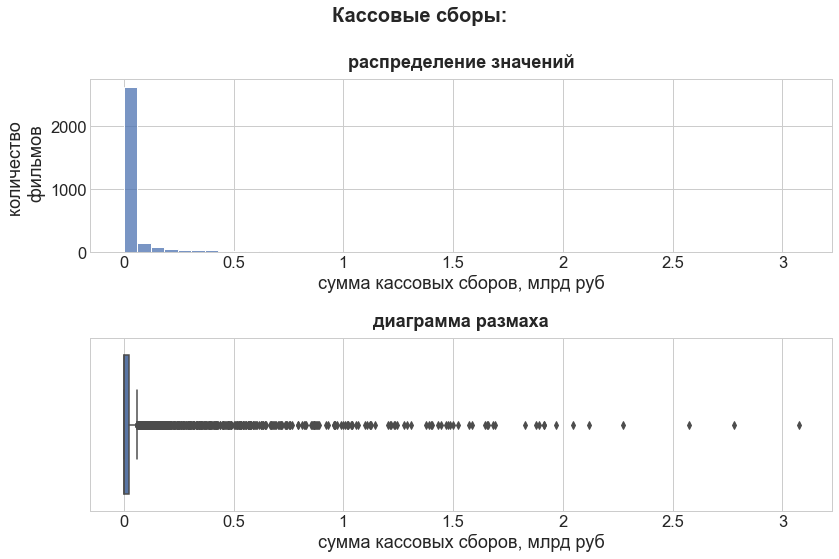

In [120]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
plt.suptitle('Кассовые сборы:', fontweight='bold', fontsize=20)

ax1=plt.subplot(2, 1, 1)
sns.histplot(data=df, x='box_office', bins=50)
plt.title('распределение значений', fontweight='bold', fontsize=18, y=1.03)
plt.xlabel('сумма кассовых сборов, млрд руб')
plt.ylabel('количество \n фильмов')
ax1.set_xticks([0, 500000000, 1000000000, 1500000000, 2000000000, 2500000000, 3000000000])
ax1.set_xticklabels([0, 0.5, 1, 1.5, 2, 2.5, 3])

ax2=plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='box_office')
plt.title('диаграмма размаха', fontweight='bold', fontsize=18, y=1.03)
plt.xlabel('сумма кассовых сборов, млрд руб')
ax2.set_xticks([0, 500000000, 1000000000, 1500000000, 2000000000, 2500000000, 3000000000])
ax2.set_xticklabels([0, 0.5, 1, 1.5, 2, 2.5, 3])


plt.tight_layout()
plt.show();

На гистограмме распределения значений видно пик значений около 0, затем плавное снижение. На графике диаграммы размаха можно визуально определить примерную верхнюю границу нормы и распределение выбивающихся значений. 

О чём могут рассказать эти данные:
- похоже, они косвенно опровергают первую теорию: если бы все "нормальные данные" исчислялись миллионами/сотнями тысяч, а значения в 40, 50 и тд рублей были аномалиями, которые на самом деле являются 40 и 50 миллионами, то на гистограмме было ожидаемо увидеть разрывы между "аномалиями" (сборами в 40, 50 и тд рублей) и "нормальными данными" (с большими цифрами). 
- графики косвенно подтверждают, что все данные - "нормальные". Видимо, причина необычных значений в ограничениях сбора информации (с определённого срока, с определённых источников информации о сборах). Поэтому все данные оставляю как есть. Графики помогли убедиться в обоснованности такого решения.

In [121]:
df['budget'].isna().sum()

7154

In [122]:
df['refundable_support'].isna().sum()

7154

In [123]:
df['nonrefundable_support'].isna().sum()

7154

Количество пропусков с данными о бюджете, возвратных и невозвратных объёмах госуд.поддержки идентичное, можно создать новый небольшой датафрейм для анализа именно этих данных.

Попробуем ответить на вопрос: **как бюджет фильмов соотносится с объёмами возвратных и невозвратных средств гос.поддержки?** Используем для этого новый датафрейм:

In [124]:
state_money = df.dropna(subset=['budget']) 

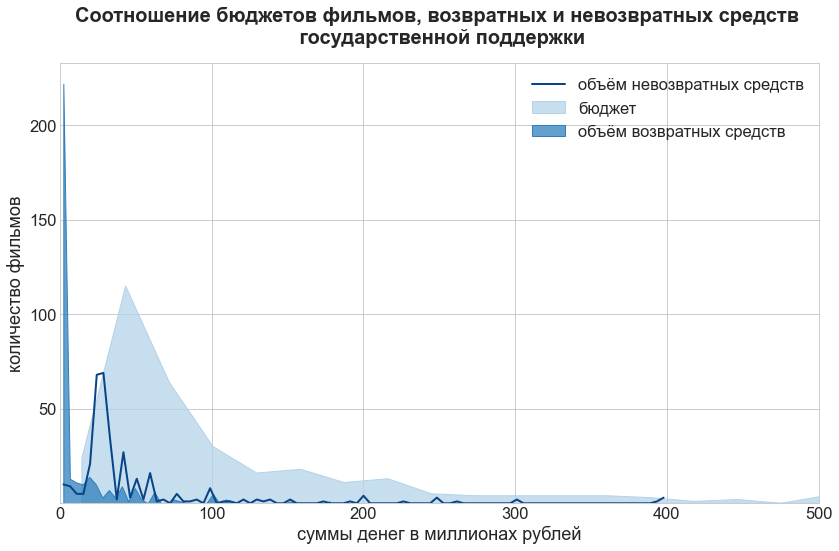

In [125]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')

ax=sns.histplot(data=state_money, x='budget', element="poly", label='бюджет', color='#b4d3e9')
sns.histplot(data=state_money, x='refundable_support', element="poly", label='объём возвратных средств', 
             color='#3080bd', ax=ax)
sns.histplot(data=state_money, x='nonrefundable_support', element="poly", fill=False, linewidth=2,
             label='объём невозвратных средств', color='#084488', ax=ax)
plt.title('Соотношение бюджетов фильмов, возвратных и невозвратных средств \n государственной поддержки', 
          fontweight='bold', fontsize=20, y=1.03)
plt.legend()
plt.xlabel('суммы денег в миллионах рублей')
plt.ylabel('количество фильмов')
plt.xlim(0, 500000000)
ax.set_yticks([0,50,100, 150, 200])
ax.set_yticklabels(['', 50, 100, 150, 200])
ax.set_xticks([0, 100000000, 200000000, 300000000, 400000000, 500000000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

plt.tight_layout()
plt.show();

**На графике мы видим**, что топовые значения у каждого параметра расположены в разных местах:
- **объёмы возвратных средств госуд.поддержки** чаще всего связаны с минимальными значениями (резко выделяющийся пик около 0),
- **объёмы невозвратных средств** чаще всего имеют значения около 25-40 млн,
- **бюджеты фильмов** более широко и плавно "размазаны" по графику, то есть у этого параметра более широкий диапазон различных значений, самый частый встречающийся вариант бюджета фильма в районе 40-50 млн (с более длинным спадом значений по сравнению с другими параметрами),
- тянущийся "хвост" графика заполнен значениями бюджетов и невозвратных средств.

Поищем странные соотношения. Посмотрим количество строк, где бюджет фильма меньше объёма возвратных средств:

In [126]:
(len(state_money.query('budget < refundable_support')))

10

Посмотрим сами строки:

In [127]:
state_money.query('budget < refundable_support')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2472,Воин (2015),"111,017,315.00",2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен,"111,009,615.00",2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,"114,001,715.00",2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
3047,Любовь с ограничениями,"111,008,216.00",2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3675,Чудо-юдо,"114,001,817.00",2017-06-27 12:00:00+00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",«6+» - для детей старше 6 лет,"20,000,000.00","20,000,000.00",0.00,Фонд кино,5.20,"мультфильм,фэнтези,семейный","55,108,014.76"
3739,Мифы,"111,004,317.00",2017-06-07 12:00:00+00:00,Художественный,"ООО ""ХАЙПФИЛМ"", ООО ""Арт Пикчерс Студия""",Россия,А.Молочников,"Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...",«16+» - для детей старше 16 лет,"25,000,000.00","20,000,000.00",0.00,Фонд кино,4.80,комедия,"50,451,949.00"
5673,Селфи,"111,012,117.00",2018-02-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,"20,000,000.00","40,000,000.00",0.00,Фонд кино,5.80,"триллер,драма","225,196,400.03"
5806,Два хвоста,"114,001,018.00",2018-05-31 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"В.Ровенский, Н.Лопато, В.Азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,"10,000,000.00","60,000,000.00",0.00,Фонд кино,5.00,"мультфильм,детский","106,514,301.03"
6008,Принцесса и дракон,"114,003,018.00",2018-08-23 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,М.Нефедова,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,"40,000,000.00","40,000,000.00",0.00,Фонд кино,5.20,"мультфильм,фэнтези,детский","83,366,328.66"
6823,Большое путешествие,"114,002,419.00",2019-04-20 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,"60,000,000.00","120,000,000.00",0.00,Фонд кино,6.20,"мультфильм,комедия,приключения","147,606,826.51"


In [128]:
print(len(state_money.query('budget < nonrefundable_support')))
state_money.query('budget < nonrefundable_support')

16


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,"111,023,614.00",2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,"111,000,415.00",2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),"111,017,315.00",2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2615,Савва. Сердце воина,"114,001,715.00",2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,"111,010,215.00",2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,"111,017,115.00",2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,"111,004,916.00",2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,"111,008,216.00",2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),"111,018,116.00",2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"
3675,Чудо-юдо,"114,001,817.00",2017-06-27 12:00:00+00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",«6+» - для детей старше 6 лет,"20,000,000.00","20,000,000.00",0.00,Фонд кино,5.20,"мультфильм,фэнтези,семейный","55,108,014.76"


Количество фильмов, где бюджет равен нулю:

In [129]:
(len(state_money.query('budget == 0')))

17

Сами фильмы:

In [130]:
state_money.query('budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,"111,023,614.00",2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,"111,000,415.00",2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),"111,017,315.00",2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен,"111,009,615.00",2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,"114,001,715.00",2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,"111,010,215.00",2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,"111,017,115.00",2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,"111,004,916.00",2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,"111,008,216.00",2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),"111,018,116.00",2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Если ещё посмотреть на соотношение данных из столбца 'budget', то мы увидим странную картину: в некоторых случаях бюджет фильма меньше объёмов возвратных или невозвратных средств госуд.поддержки (в 10 и 16 случаях соответственно). Это странно потому, что в значении бюджета уже должна быть заложена такая госуд.поддержка. Это связано со значением бюджета 0 (этот момент был замечен ещё на шаге предобработки дубликатов). Нули, видимо, по сути являются пропусками данных о бюджете фильмов, которые получили госуд.финансирование, и по-прежнему законность сокрытия таких данных вызывает вопросы.

Также интересно было бы узнать, как соотносятся бюджеты, возвратные и невозвратные средства: есть ли какие-либо закономерности в этом вопросе, есть ли факторы, влияющие на финансовую успешность фильмов. Об этом предстоит узнать уже в исследовательском анализе данных.

### Добавление новых столбцов

Создаём новый столбец с информацией о годе проката:

In [131]:
df['year'] = pd.DatetimeIndex(df['show_start_date']).year 

Проверяем:

In [132]:
df.head() 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,"221,048,915.00",2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,"111,013,716.00",2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,неизвестно,6.60,"драма,военный",NaN,2016
2,Особо опасен,"221,038,416.00",2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,"221,026,916.00",2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,"221,030,815.00",2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,6.80,"фантастика,боевик,триллер",NaN,2015


Создадим два новых столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [133]:
df['main_director'] = df['director'].str.split(',', 1, expand=True)[0]

In [134]:
df['main_genre'] = df['genres'].str.split(',', 1, expand=True)[0]

Проверяем:

In [135]:
df.head() 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
0,Открытый простор,"221,048,915.00",2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,"111,013,716.00",2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,неизвестно,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,"221,038,416.00",2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,"221,026,916.00",2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,"221,030,815.00",2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,неизвестно,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


Подсчитаем, какую долю от общего бюджета фильма составляет государственная поддержка:

In [136]:
df['ratio_state_budget'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget'] 

In [137]:
state_money = df.dropna(subset=['budget'])
state_money.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,ratio_state_budget
1281,Пока еще жива,"111,005,313.00",2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,"111,003,314.00",2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,неизвестно,"28,140.00",2014,А.Якимчук,неизвестно,0.70
1498,Невидимки,"111,004,213.00",2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,"111,004,314.00",2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,"111,004,414.00",2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,0.62


## Исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год:

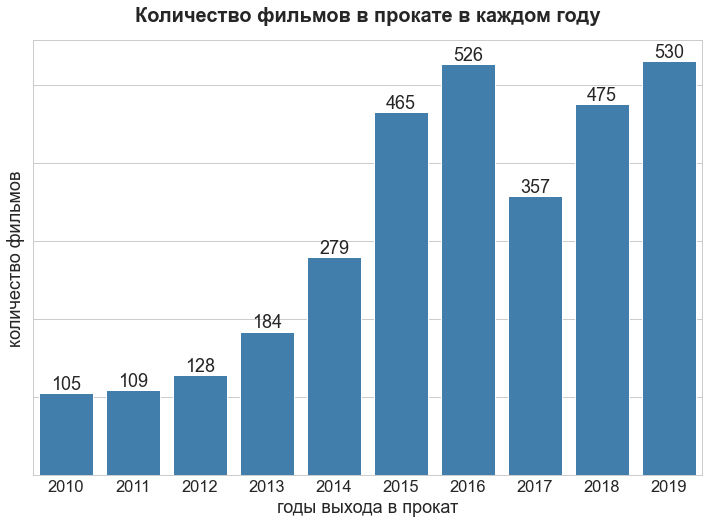

In [138]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')

df_plot = df.query('box_office >=0').groupby('year', as_index=False).agg({'puNumber':'count'})
ax=sns.barplot(data=df_plot, x='year', y='puNumber', color='#3080bd')
plt.title('Количество фильмов в прокате в каждом году', fontweight='bold', fontsize=20, y=1.03)
plt.xlabel('годы выхода в прокат')
plt.ylabel('количество фильмов')
for i in ax.containers:
    ax.bar_label(i,)
ax.set(yticklabels=[])  
ax.tick_params(left=False)

plt.show();

Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах:

In [139]:
fraction = len(df.loc[df['box_office'] >= 0]) / len(df)
print(f'Доля фильмов с указанной информацией о прокате в кинотеатрах: {fraction: .2%}')

Доля фильмов с указанной информацией о прокате в кинотеатрах:  42.19%


**Итак, динамика проката (количество фильмов)** выглядит следующим образом:
- начиная с **2010 года (105 фильмов, это минимальное значение)** количество фильмов постоянно увеличивалось, причём этот рост усиливался год от года 
- в 2016 году был первый пик значений (526 фильмов)
- далее в 2017 году был спад,  и затем снова рост 
- в **2019 году зафиксировано наибольшее количество фильмов в прокате: 530**.

Таким образом, с 2010 до 2019 года в целом наблюдается явная тенденция увеличения количества фильмов в прокате год от года. Рост не всегда происходит одинаково, иногда быстрее (2013-2016), иногда медленнее (2010-2012), и однажды случился достаточно ощутимый спад количества фильмов (в 2017), однако общая тенденция к увеличению количества фильмов в прокате сохранилась. 

In [140]:
df_plot = df.groupby('year', as_index=False).agg({'box_office':'sum'})
df_plot

,year,box_office
0,2010,"2,428,654.00"
1,2011,"14,102,765.00"
2,2012,"6,955,423.00"
3,2013,"29,799,706.20"
4,2014,"7,444,951,859.20"
5,2015,"39,497,365,196.40"
6,2016,"47,866,299,741.91"
7,2017,"48,563,707,217.51"
8,2018,"49,668,403,134.32"
9,2019,"48,425,708,779.59"


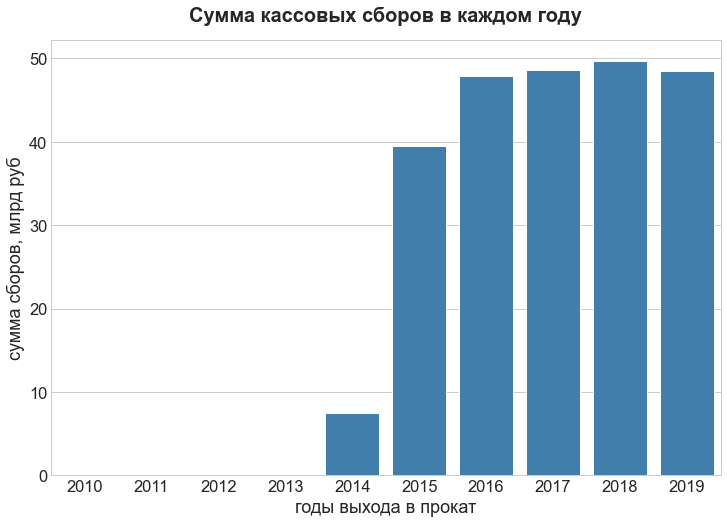

In [141]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')

df_plot = df.groupby('year', as_index=False).agg({'box_office':'sum'})
ax=sns.barplot(data=df_plot, x='year', y='box_office', color='#3080bd')
plt.title('Сумма кассовых сборов в каждом году', fontweight='bold', fontsize=20, y=1.03)
plt.xlabel('годы выхода в прокат')
plt.ylabel('сумма сборов, млрд руб')
ax.set_yticks([0, 10000000000, 20000000000, 30000000000, 40000000000, 50000000000])
ax.set_yticklabels([0, 10, 20, 30, 40, 50])

plt.show();

Что касается **суммы кассовых сборов** в каждом году, то здесь общая тенденция, с одной стороны, напоминает тенденцию  роста значений от 2010 к 2019 году, как это было в ситуации с подсчётом количества фильмов, вышедших в прокат в каждом году. Но, с другой стороны, характер этого роста иной: можно сказать, он носит "взрывной" характер:
- в 2010-2013 годах суммы сборов измерялись в миллионах рублей, а начиная с 2014 - в миллиардах;
- 2014 год, можно сказать, был переходным (от исчилений в миллионах (2013г. - 29 млн) перешли к миллиардам (2014г. - 7.4 млрд); - в 2015 году сумма сборов резко увеличилась (от 7.4 млрд. до 39.5 млрд.);
- 2016-2019 года показывают похожие суммы сборов, с небольшими колебаниями (47-49 млрд.)
- **минимальная сумма сборов** в 2010 году:	2 428 654 руб.
- **максимальная сумма сборов** в 2018 году: 49 668 403 134 руб.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [142]:
box_table = df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
box_table.columns=['средняя сумма сборов', 'медианная сумма сборов']
box_table

,средняя сумма сборов,медианная сумма сборов
year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,000,569.85","3,846,679.41"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


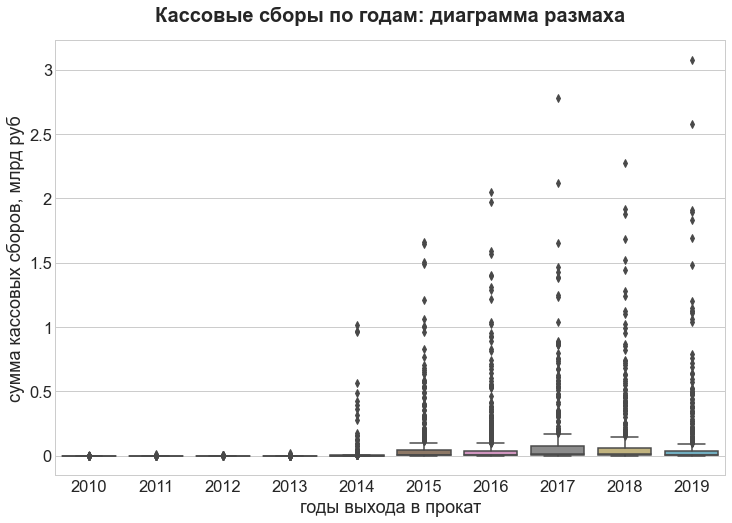

In [143]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')

ax=sns.boxplot(data=df, x='year', y='box_office')
plt.title('Кассовые сборы по годам: диаграмма размаха', fontweight='bold', fontsize=20, y=1.03)
plt.xlabel('годы выхода в прокат')
plt.ylabel('сумма кассовых сборов, млрд руб')
ax.set_yticks([0, 500000000, 1000000000, 1500000000, 2000000000, 2500000000, 3000000000])
ax.set_yticklabels([0, 0.5, 1, 1.5, 2, 2.5, 3])

plt.show();

Между **средней суммой сборов и медианной есть очень большой разрыв**. Средняя сумма существенно выше медианной, это возникает потому, что **есть много фильмов, кассовые сборы которых значительно больше предполагаемой "нормы"**.
На графике видно, как много выбивающихся значений присутствует в данных с 2014 года. Если верхней границы нормы является значение примерно в диапазоне **100 - 200 млн** в зависимости от года, то есть масса фильмов, кассовые сборы которых выше этой нормы и чьи сборы превышают и 500 млн, и 1 млрд, и есть даже суммы в районе 2, 2.5 и 3 миллиардов. **Настолько большие и часто встречающиеся значения и оказывают влияние на разницу между средней суммой и медианой**.

Далее: 
- определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год 
- узнаем, фильмы с каким возрастным ограничением собрали больше всего денег в прокате
- посмотрим, меняется ли картина в зависимости от года

In [144]:
df_year = (df
    .query('year >= 2015')
    .groupby('age_restriction', as_index=False)
    .agg({'box_office':['count', 'sum', 'mean', 'median']}))

df_year.columns = ['возрастное ограничение', 'количество', 'сумма сборов', 'среднее', 'медиана']
df_year

,возрастное ограничение,количество,сумма сборов,среднее,медиана
0,«0+» - для любой зрительской аудитории,91,"809,077,425.97","8,890,960.72","2,943,318.70"
1,«12+» - для детей старше 12 лет,348,"60,619,446,628.33","174,193,812.15","5,065,044.25"
2,«16+» - для детей старше 16 лет,805,"76,034,733,643.63","94,453,085.27","5,600,007.00"
3,«18+» - запрещено для детей,792,"40,759,615,572.12","51,464,161.08","6,154,439.17"
4,«6+» - для детей старше 6 лет,317,"55,798,610,799.68","176,020,854.26","13,736,207.98"


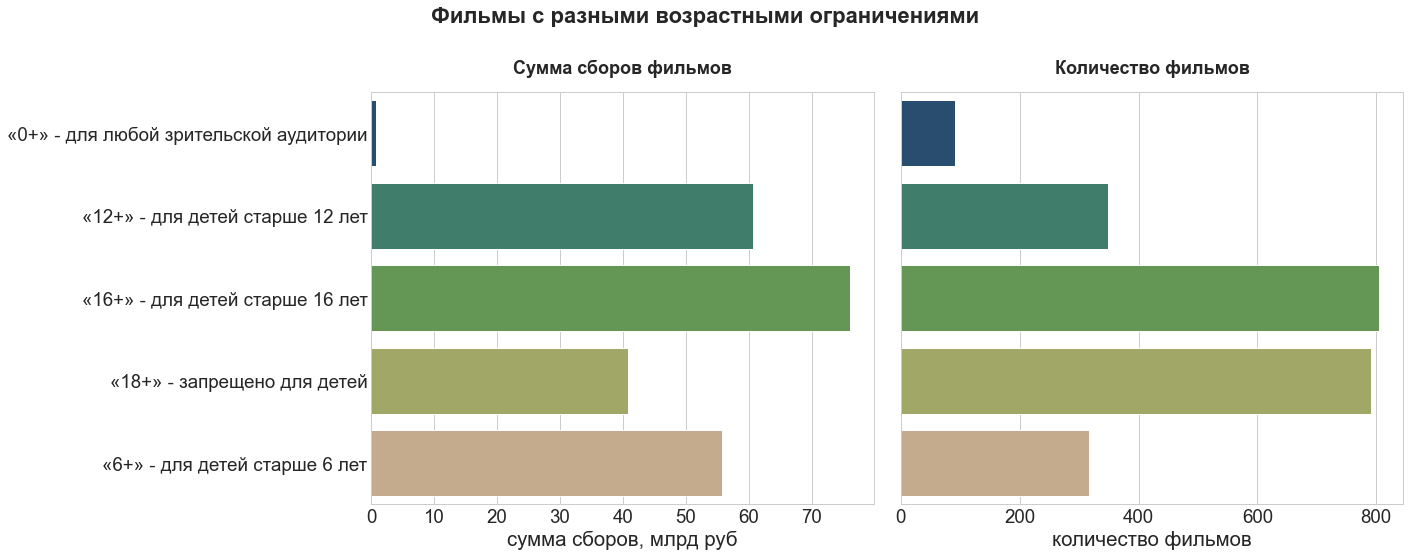

In [145]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.7)
plt.style.use('seaborn-whitegrid')
plt.suptitle('Фильмы с разными возрастными ограничениями', fontweight='bold', fontsize=22)

ax=plt.subplot(1, 2, 1)
ax1=sns.barplot(data=df_year, x='сумма сборов', y='возрастное ограничение', palette='gist_earth')
plt.title('Сумма сборов фильмов', fontweight='bold', fontsize=18, y=1.03)
plt.ylabel('')
plt.xlabel('сумма сборов, млрд руб')
ax1.set_xticks([0, 10000000000, 20000000000, 30000000000, 40000000000, 
               50000000000, 60000000000, 70000000000])
ax1.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70])

ax2=plt.subplot(1, 2, 2)
ax2=sns.barplot(data=df_year, x='количество', y='возрастное ограничение', palette='gist_earth')
plt.title('Количество фильмов', fontweight='bold', fontsize=18, y=1.03)
plt.ylabel('')
plt.xlabel('количество фильмов')
ax2.set(yticklabels=[])  
ax2.tick_params(left=False)

plt.tight_layout()
plt.show();

- в период с 2015 по 2019 год **фильмы с возрастным ограничением "16+" и "12+" собрали наибольшие суммы в прокате** (76 и 60.6 млрд. соответственно). Также значительную сумму соборов собрали фильмы **"6+"** (55.8 млрд.).
- чуть меньше собрали фильмы "18+" (40 млрд.)
- меньше всего составила сумма кассовых сборов фильмов с возрастным ограничением "0+" (809 млн.)

Но: важно учесть само количество фильмов в этих категориях (оно очень разное и это влияет на сумму сборов).
Например, фильмы с возрастным ограничением "16+" собрали такие большие кассовые сборы, потому что количество таких фильмов в прокате самое большое (805). Но фильмы с возрастным ограничением "12+" ломают эту логику: по сумме сборов они на втором месте (60.6 млрд), а количество фильмов - гораздо меньшее (348). А фильмов "18+" в прокате почти так же много, как "16+", но они, тем не менее, по суммам сборов уступают другим трём категориям. Попробуем представить себя в роли инвестора и узнать, фильм с каким возрастным ограничением потенциально имеет больше шансов стать наиболее финансово успешным.

**Среднее значение** говорит о том, что:
- очень близкие высокие финансовые результаты показывают фильмы с возрастными ограничениями "6+" и "12+" (176 и 174 млн.)
- средние результаты показывают фильмы с возрастными ограничениями "16+" и "18+" (94 и 51 млн.)
- самый низкий результат у фильмов категории "0+" (чуть меньше 9 млн.)

А вот **медианное значение** показывает другие цифры:
- во-первых, важно отметить, что они значительно более низкие (это говорит о широком разбросе значений, т.е. часто бывают фильмы, сумма сборов которых значительно выше сумм сборов других фильмов в этой же категории)
- здесь совпадающий лидер "экономической эффективности": похоже, часто фильм с возрастным ограничением "6+" действительно собирает в прокате больше денег, чем какой-либо фильм с другим возрастным ограничением (и среднее, и медиана ставят эту категорию на 1 место такого условного финансового рейтинга фильмов)
- близкие к друг другу результаты показывают фильмы с возрастными ограничениями "18+", "16+", "12+" (6, 5.5, 5 млн.)
- и на последнем месте "рейтинга" опять фильмы с возрастным ограничением "0+" (и здесь нужно заметить, что количество таких фильмов заметно ниже количества фильмов в других категориях: всего 91 против 300+, 700+, 800+ фильмов в других разделах; а это значит, небольшая выборка может давать более несбалансированные результаты по сравнению с более многочисленными группами).

Итак, данные говорят о том, что потенциальному инвестору в первую очередь стоит обращать внимание на фильмы с возрастным ограничением "6+".

Теперь рассмотрим распределение сумм сборов всех фильмов по годам и особенно проследим за значениеями "тройки лидеров" по сумме кассовых сборов по годам (это фильмы с возрастными ограничениями "16+", "12+", "6+").

In [146]:
df_plot = (df.query('year >= 2015')
             .groupby(['age_restriction', 'year'], as_index=False)
             .agg({'box_office':'sum','title':'count'}))

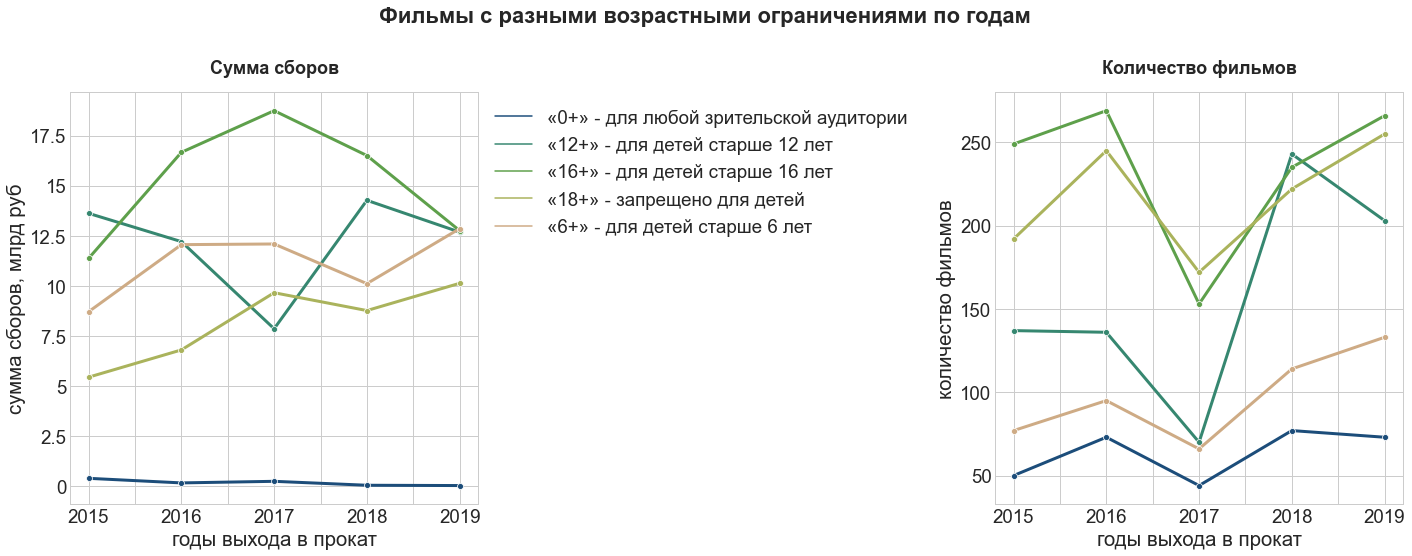

In [147]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.7)
plt.style.use('seaborn-whitegrid')
plt.suptitle('Фильмы с разными возрастными ограничениями по годам', fontweight='bold', fontsize=22)

palette_color = sns.color_palette('gist_earth', 5)

ax1=plt.subplot(1, 2, 1)
plt.title('Сумма сборов', 
          fontweight='bold', fontsize=18, y=1.03)
ax1=sns.lineplot(data=df_plot, x='year', y='box_office', hue='age_restriction', marker='o', 
                 palette=palette_color, linewidth=3)
plt.ylabel('сумма сборов, млрд руб')
plt.xlabel('годы выхода в прокат')
ax1.set_yticks([0, 2500000000, 5000000000, 7500000000, 10000000000, 12500000000, 15000000000, 17500000000])
ax1.set_yticklabels([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5])
ax1.set_xticks([2015, 2015.5, 2016, 2016.5, 2017, 2017.5, 2018, 2018.5, 2019])
ax1.set_xticklabels([2015, ' ', 2016, ' ', 2017, ' ', 2018, ' ', 2019])
plt.legend()
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

ax2=plt.subplot(1, 2, 2)
plt.title('Количество фильмов', 
          fontweight='bold', fontsize=18, y=1.03)
ax2=sns.lineplot(data=df_plot, x='year', y='title', hue='age_restriction', marker='o', palette=palette_color, 
                 legend=False, linewidth=3)
plt.ylabel('количество фильмов')
plt.xlabel('годы выхода в прокат')
ax2.set_xticks([2015, 2015.5, 2016, 2016.5, 2017, 2017.5, 2018, 2018.5, 2019])
ax2.set_xticklabels([2015, ' ', 2016, ' ', 2017, ' ', 2018, ' ', 2019])

plt.tight_layout()
plt.show();

Что интересного показывают эти графики? Отметим то, что бросается в глаза в первую очередь: в 2017 году количество  фильмов всех возрастных категорий упало, но не всегда это сказалось на сумме кассовых сборов.

- фильмов категории "18+" выпущено в прокат много, а сборов они приносят неожиданно мало для такого количества
- в категории фильмов "12+" заметное снижение количества фильмов в 2017 году отразилось на сумме кассовых сборов: они тоже "упали"
- а вот в категории фильмов "16+" противоположная ситуация: количество фильмов в прокате в 2017 тоже было меньшим по сравнению с другими годами, но сумма сборов, наоборот, оказалась самой большой
- в категории фильмов "6+" уменьшение количества фильмов в прокате в 2017 году тоже не сказалось на сумме сборов - она была достаточно высокой.

Получается, мы не можем сказать, что количество фильмов в какой-либо категории в прокате всегда напрямую сказывается на сумме сборов. Очевидно, есть и другие факторы. Предположу, что это "выбивающиеся" фильмы с необычно большими кассовыми сборами.

Посмотрим на фильмы с самыми большими кассовыми сборами в категории "16+", выпущенные в 2017 году и в соседние с ним годы. Если количество фильмов с необычно большими суммами сборов и сами суммы сборов больше в 2017 году, чем в 2016 и 2018 годах, значит, это и будет влияющий на ситуацию фактор. 

In [148]:
(df
    .query('year >= 2015 and age_restriction == "«16+» - для детей старше 16 лет" and year == 2017')
    .sort_values(by='box_office', ascending=False).head()
)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,ratio_state_budget
3488,Пираты Карибского моря: Мертвецы не рассказыва...,"121,009,217.00",2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,6.60,"фэнтези,боевик,комедия","2,118,396,119.00",2017,Йоаким Реннинг,фэнтези,NaN
3523,Стражи Галактики. Часть 2,"121,008,117.00",2017-04-27 12:00:00+00:00,Художественный,"Марвел Студиос, Уолт Дисней Пикчерз",США,Джеймс Ганн,Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.60,"фантастика,боевик,приключения","1,468,779,681.00",2017,Джеймс Ганн,фантастика,NaN
5654,Джуманджи: Зов джунглей,"121,027,517.00",2017-12-21 12:00:00+00:00,Художественный,"Мэтт Толмак Продакшнз, Радар Пикчерз, Севен Ба...",США,Джейк Касдан,Мэтт Толмак,«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,6.80,"фэнтези,боевик,комедия","1,246,587,858.00",2017,Джейк Касдан,фэнтези,NaN
5548,Тор: Рагнарёк,"121,022,917.00",2017-11-02 12:00:00+00:00,Художественный,"Марвел Интертейнмент, Марвел Студиос, Уолт Дис...",США,Тайка Вайтити,Кеви Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,8.20,"история,драма,боевик","1,229,588,275.00",2017,Тайка Вайтити,история,NaN
3613,Мумия (2017),"121,009,817.00",2017-05-30 12:00:00+00:00,Художественный,"Шон Даниэль Компани, Сикрит Хайдаут, Юниверсал...",США,Алекс Куртцман,"Шон Дэниэл, Алекс Куртцман, Крис Морган",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,5.60,"фэнтези,боевик,триллер","871,151,453.00",2017,Алекс Куртцман,фэнтези,NaN


In [149]:
(df
    .query('year >= 2015 and age_restriction == "«16+» - для детей старше 16 лет" and year == 2016')
    .sort_values(by='box_office', ascending=False).head()
)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,ratio_state_budget
3396,Отряд самоубийц,"121,018,816.00",2016-06-21 12:00:00+00:00,Художественный,"Атлас Интертейнмент, Ди Си Интертейнмент, Дюн ...",США,Дэвид Эйр,"Чарльз Ровен, Ричард Скал",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,6.10,"фантастика,боевик,фэнтези","1,570,380,294.00",2016,Дэвид Эйр,фантастика,NaN
3318,Доктор Стрэндж,"121,027,416.00",2016-10-03 12:00:00+00:00,Художественный,Марвел Студиос,США,Скотт Дерриксон,Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.40,"фантастика,фэнтези,боевик","1,288,356,732.00",2016,Скотт Дерриксон,фантастика,NaN
2886,Первый мститель: Противостояние,"121,010,316.00",2016-04-28 12:00:00+00:00,Художественный,"Марвел Интертейнмент, Марвел Студиос",США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.40,"фантастика,боевик,приключения","955,507,415.00",2016,Джо Руссо,фантастика,NaN
3661,Дом странных детей мисс Перегрин,"121,022,316.00",2016-08-01 12:00:00+00:00,Художественный,"Буллетпроф Купид, Чемин Интертейнмент, СкоупПи...",США - Бельгия - Великобритания,Тим Бёртон,"Дженно Топпинг, Каттерли Фроуенфельдер, Питер ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,6.80,"фэнтези,триллер,драма","928,216,745.50",2016,Тим Бёртон,фэнтези,NaN
3521,Кредо убийцы,"121,030,616.00",2016-11-17 12:00:00+00:00,Художественный,"Ридженси Энтерпрайзис, Убисофт, Нью Ридженси П...",США - Великобритания - Франция - Гонконг,Джастин Курзель,"Жан-Жюльен Барроне, Патрик Краули, Майкл Фассб...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,5.70,"фантастика,боевик,приключения","922,362,215.00",2016,Джастин Курзель,фантастика,NaN


In [150]:
(df
    .query('year >= 2015 and age_restriction == "«16+» - для детей старше 16 лет" and year == 2018')
    .sort_values(by='box_office', ascending=False).head()
)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,ratio_state_budget
6274,Веном,"121,022,018.00",2018-10-04 12:00:00+00:00,Художественный,"Коламбиа Пикчерз, Марвел Интертейнмент, Паскал...",США,Рубен Флейшер,"Ави Арад, Эми Паскаль, Мэтт Толмак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,6.80,"боевик,фантастика,триллер","1,913,257,923.06",2018,Рубен Флейшер,боевик,NaN
5864,Мстители: Война бесконечности,"121,009,118.00",2018-05-03 12:00:00+00:00,Художественный,Марвел Студиос,США,"Энтони Руссо, Джо Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.90,"фантастика,боевик,приключения","1,875,989,712.42",2018,Энтони Руссо,фантастика,NaN
6470,Полицейский с рублевки. Новогодний беспредел,"111,023,318.00",2018-12-20 12:00:00+00:00,Художественный,"ООО ""ЛЕГИО ФЕЛИКС"", ООО ""Ника ТВ""",Россия,И.Куликов,"И.Куликов, А.Семенов, ООО ""Ника ТВ""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,5.80,"комедия,приключения","1,682,680,039.03",2018,И.Куликов,комедия,NaN
5733,Чёрная пантера,"121,002,618.00",2018-02-22 12:00:00+00:00,Художественный,"Марвел Студиос, Уолт Дисней Пикчерз",США,Райан Куглер,"Девид Джей Грант, Кевин Фейги",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,NaN,неизвестно,"955,498,949.57",2018,Райан Куглер,неизвестно,NaN
6039,Мег: Монстр глубины,"121,014,918.00",2018-08-09 12:00:00+00:00,Художественный,"Ди Бонавентура Пикчерз, Эйпллз Интертейнмент, ...",США - КНР,Джон Тёртлтауб,"Лоренцо ди Бонавентура, Колин Уилсон, Белль Эй...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,5.90,"ужасы,фантастика,боевик","868,115,386.03",2018,Джон Тёртлтауб,ужасы,NaN


Итак, мы выяснили, что кроме количества фильмов в какой-либо категории на сумму сборов влияет что-то ещё. Например, в категории фильмов с возрастным ограничением "16+" в 2017 году выпущено меньше фильмов, чем в другие годы, но кассовые сборы самые большие именно в этот год. 

Если мы посмотрим на фильмы с самыми большими кассовыми сборами в категории "16+", мы увидим, что:
- в 2017 году 3 фильма собрали сумму кассовых сборов более 1 млрд.рублей и 1 фильм собрал более 2 млрд.руб. 
- в 2016 году только 2 фильма собрали более 1 млрд.руб.
- в 2018 году 3 фильма собрали суммы такого порядка

Это подтверждает выдвинутое ранее предположение: фильмы с необычно большими кассовыми сборами влияют на значение общих сборов в той или иной категории в разные годы. Можно предположить, что есть факторы, которые влияют на потенциал фильма пробить такой "рубеж" сборов в 1 млрд: 
- страна производства (в вышеприведённых строках почти все фильмы, собравшие миллиарды, произведены в США, исключением является только один фильм из России), 
- возможно, студия-производитель, жанр, главный режиссёр
Но это не является целью исследования, поэтому далее углубляться в этот вопрос не будем.

Получается, можно выделить два главных фактора, влияющих на сумму сборов в той или иной возрастной категории:
- количество выпущенных фильмов в этой категории
- фильмы со сборами более 1 млрд. руб.

In [151]:
len(df.query('box_office >= 1000000000'))

55

Всего таких фильмов, собравших в прокате миллиардные суммы, не так уж много: 55. 

In [152]:
df_billion = df.query('box_office >= 1000000000')

In [153]:
df_billion['age_restriction'].unique()

array(['«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«6+» - для детей старше 6 лет',
       '«18+» - запрещено для детей'], dtype=object)

In [154]:
df_billion = (df_billion.groupby(['year', 'age_restriction'])
                        .agg({'title':'count'})
                        .sort_values(by=['year', 'title'], ascending=[True, True]))
df_billion

title
year age_restriction                       
2014 «12+» - для детей старше 12 лет      1
2015 «16+» - для детей старше 16 лет      1
     «18+» - запрещено для детей          1
     «6+» - для детей старше 6 лет        2
     «12+» - для детей старше 12 лет      4
2016 «18+» - запрещено для детей          1
     «16+» - для детей старше 16 лет      2
     «6+» - для детей старше 6 лет        3
     «12+» - для детей старше 12 лет      5
2017 «18+» - запрещено для детей          1
     «12+» - для детей старше 12 лет      2
     «6+» - для детей старше 6 лет        3
     «16+» - для детей старше 16 лет      4
2018 «6+» - для детей старше 6 лет        1
     «18+» - запрещено для детей          2
     «16+» - для детей старше 16 лет      3
     «12+» - для детей старше 12 лет      5
2019 «16+» - для детей старше 16 лет      2
     «18+» - запрещено для детей          3
     «6+» - для детей старше 6 лет        4
     «12+» - для детей старше 12 лет      5

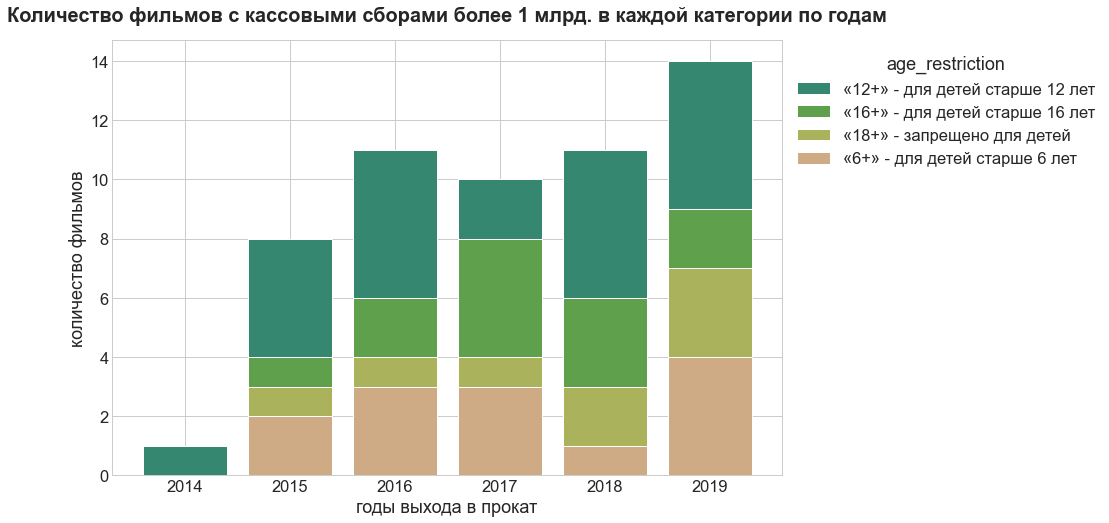

In [155]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')

palette_color = ['#368770', '#5ea04b', '#aab35c', '#ceab85']

ax=sns.histplot(df_billion, x='year', hue='age_restriction', 
                weights='title', discrete=True, shrink=.8, multiple="stack", alpha=1, legend=True,
               palette=palette_color)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Количество фильмов с кассовыми сборами более 1 млрд. в каждой категории по годам', 
             fontweight='bold', fontsize=20, y=1.03)
plt.xlabel('годы выхода в прокат')
plt.ylabel('количество фильмов')


plt.show();

На графике мы видим, как менялось количество фильмов с более чем миллиардными сборами в каждой возрастной категории с течением лет:
- отдельно заметим, что категории "0+" вообще не присутствует
- наибольшее количество "фильмов-миллиардеров" в категории "12+", и оно неравномерно распределяется по годам (от 1 до 5 фильмов в каждом отдельно взятом году). Есть общая тенденция роста с падением значений в 2017 году.
- в категории "16+" наблюдается плавный рост и падение значений: от 1 фильма в 2015 году до 4 фильмов в 2017 и 2 фильмов в 2019 году
- в категории "18+" наблюдается уверенный рост: в 2015-2017 годах выходило по 1 фильму с подобным размером сборов, в 2018 году уже 2 фильма и в 2019 году 3 фильма
- в категории "6+" тоже наблюдается тенденция увеличения количества фильмов, собирающих миллиардные сборы, от 2 таких фильмов в 2015 году к 4 фильмам в 2019 году, но есть и посреди этой общей тенденции выбивающийся, наименее удачный 2018 год - всего 1 фильм смог собрать более 1 млрд.руб.

Получается, для разных категорий фильмов есть свой "неудачный" год: 
- для категории "12+" это 2017
- а для категории "6+" это 2018

В остальном почти для всех категорий наблюдается тенденция к увеличению числа фильмов, собирающих сборы более миллиарда рублей. Исключение составляет категория "16+".

Но здесь важно учитывать, что количество фильмов с миллиардными сборами крайне невелико, выборка маленькая и уверенно говорить о тенденциях в такой ситуации сложно.

От фильмов, собирающих сборы более милиарда, вернёмся к всей совокупности фильмов. Возможно, удастся найти ещё какие-то тенденции и факторы, влияющие на распределение кассовых сборов фильмов разных возрастных категорий по годам. 

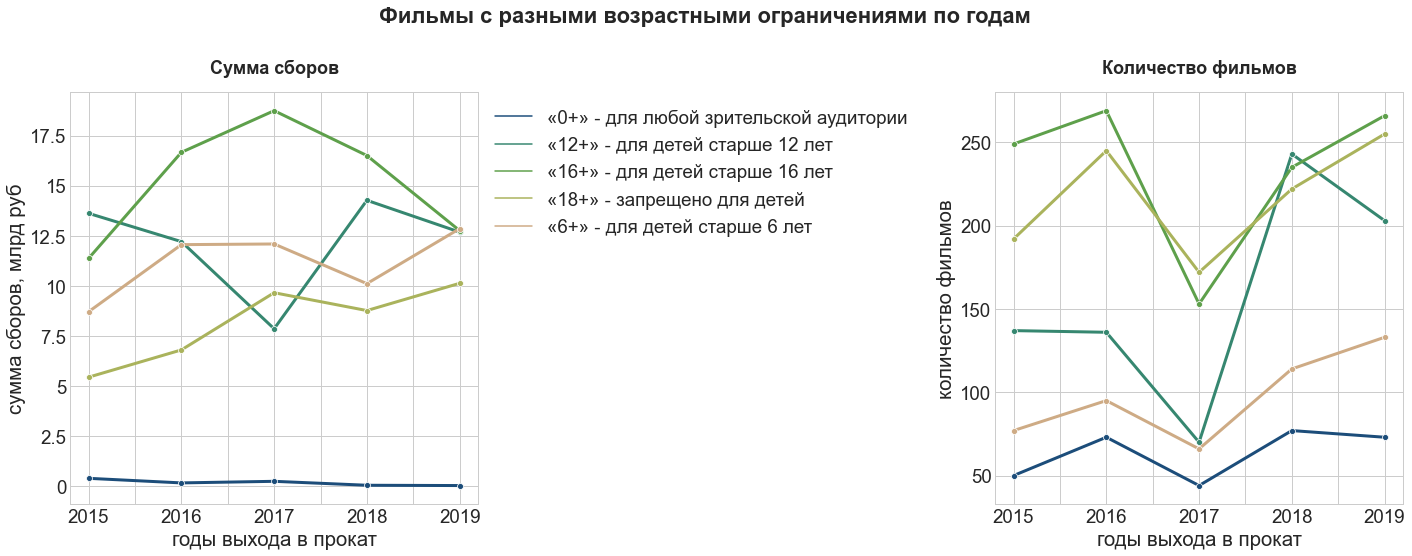

In [156]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.7)
plt.style.use('seaborn-whitegrid')
plt.suptitle('Фильмы с разными возрастными ограничениями по годам', fontweight='bold', fontsize=22)
palette_color = sns.color_palette('gist_earth', 5)

ax1=plt.subplot(1, 2, 1)
plt.title('Сумма сборов', 
          fontweight='bold', fontsize=18, y=1.03)
ax1=sns.lineplot(data=df_plot, x='year', y='box_office', hue='age_restriction', marker='o', 
                 palette=palette_color,  linewidth=3)
plt.ylabel('сумма сборов, млрд руб')
plt.xlabel('годы выхода в прокат')
ax1.set_yticks([0, 2500000000, 5000000000, 7500000000, 10000000000, 12500000000, 15000000000, 17500000000])
ax1.set_yticklabels([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5])
ax1.set_xticks([2015, 2015.5, 2016, 2016.5, 2017, 2017.5, 2018, 2018.5, 2019])
ax1.set_xticklabels([2015, ' ', 2016, ' ', 2017, ' ', 2018, ' ', 2019])
plt.legend()
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

ax2=plt.subplot(1, 2, 2)
plt.title('Количество фильмов', 
          fontweight='bold', fontsize=18, y=1.03)
ax2=sns.lineplot(data=df_plot, x='year', y='title', hue='age_restriction', marker='o', legend=False, 
                 palette=palette_color, linewidth=3)
plt.ylabel('количество фильмов')
plt.xlabel('годы выхода в прокат')
ax2.set_xticks([2015, 2015.5, 2016, 2016.5, 2017, 2017.5, 2018, 2018.5, 2019])
ax2.set_xticklabels([2015, ' ', 2016, ' ', 2017, ' ', 2018, ' ', 2019])

plt.tight_layout()
plt.show();

- во-первых, **категория фильмов "0+"** постепенно по сумме кассовых сборов "сошла на нет". Хотя второй график посказывает, что количество таких фильмов наоборот, даже увеличилось с годами.

Публика не ходит массово на такие фильмы. Возможно, дело в самой специфике возраста - с ребёнком до 6 лет бывает сложно просидеть в кинотеатре долго. Если дело в этом, то в значениях 'main_genre' мы предположительно увидим такие жанры как мультфильм, фэнтези, приключения. Если увидим что-то ещё, возможно, к самой этой категории возникнут вопросы.

- **фильмы с возрастным ограничением "12+"** в целом всегда были в тройке лидеров среди других возрастных категорий фильмов, исключение - 2017 год (тогда же и было наименьшее количество фильмов с миллиардными сборами). Интересно, что в 2015 году эта категория фильмов по сумме сборов была на первом месте, но потом уступила своё лидерство и более не смогла его вернуть, хотя количество фильмов с таким возрастным ограничением в 2018, 2019 годах было большим, чем в 2015 году. Характер изменений второго графика наводит на мысль о том, что в период 2016-2018 годов могли происходить какие-то нормативно-правовые изменения в выдаче возрастных ограничений фильмам (возможно, было некоторое ужесточение правил): в 2017 году впервые большинство фильмов получили маркировку "18+". В 2017 году около 60-70 фильмов получили маркировку "12+", а в следующем 2018 уже около 240 фильмов. То есть, возможно, на втором графике мы видим реакцию отрасли на правовые изменения. В таком случае в законах можно будет найти изменения, внесённые в 2017 или 2016 годах.

Но в самом законе о классификации информационной продукции правок не было (всё действует с 2012 года):
https://ru.wikipedia.org/wiki/Возрастная_классификация_информационной_продукции_в_России

В связанном законе были изменения в разные годы, но как раз в 2017 значимых ограничений не было введено (и в 2016 вообще не было изменений):
https://ru.wikipedia.org/wiki/Федеральный_закон_«О_защите_детей_от_информации,_причиняющей_вред_их_здоровью_и_развитию»


Получается, на падение сумм сборов в 2017 году повлияло в наибольшей степени именно снижение количества фильмов (2017 стал годом наименьшего количества фильмов и для группы "12+", и в целом для всей отрасли (это видно на втором графике).

Про падение количества фильмов в 2017 году можно дополнительно прочитать вот здесь:
https://www.kinopoisk.ru/media/article/3019510/

Основные тезисы статьи:
1. Причиной финансовых неудач AMC называют снижение интереса зрителей к просмотру кино в кинотеатрах
2. Аналитик Джефф Бок считает, что бокс-офис сейчас страдает от уже известного всем факта — переизбытка продолжений. «Голливуд столкнулся с неоправданно высокими ожиданиями от сиквелов, — считает он". 
3. студии продолжают сражаться с сериалами. Аналитик Бок замечает: «Прошлым летом все обсуждали „Очень странные дела“ от Netflix. В этом году все лето говорят об „Игре престолов“. Раньше интересовались летним репертуаром кинотеатров».
4. Кроме сериалов они (стрим-сервисы) стали предлагать зрителям собственный киноконтент.


- **категория фильмов "16+"** в целом наиболее уверенно чувствует себя по сравнению с другими возрастными категориями фильмов. Ранее мы уже рассмотрели интресное несовпадение: максимальная сумма сборов в 2017 году при минимальном количестве выпущенных фильмов в этой категории. Это связано с большим, чем обычно, количеством фильмов, собравших сборы более миллиарда (и даже 2 млрд.руб.). В последующие годы кассовые сборы снижаются, а количество фильмов растёт. Видимо, для этой возрастной группы всё-таки в конкуретной борьбе более привлекательными становятся онлайн-платформы/стриминги/интернет, а не поход в кинотеатр. 

- **категория фильмов "18+"** по суммам сборов отстаёт от других возрастных категорий. И это отставание заметно во все годы, чего не скажешь о количество выпущенных фильмов в этой категории. По количеству выпущенных фильмов категория "18+" как раз часто находится на высоких позициях (чаще всего это 2-е место среди других категорий фильмов). Получается, в сегменте "18+" есть большое разнообразие, но спрос в целом не отвечает взаимностью предложению. Например, сумма сборов в 2019 году увеличилась, видимо, только по причине макисмального количества фильмов в этой категории за все годы (более 250). Возможно, в этой возрастной категории наиболее сильно проявляется влияние масштабного развития онлайн-сервисов. Подробнее об этой "эре стриминговых сервисов" можно прочитать здесь:
https://www.forbes.ru/biznes/346707-era-kartochnogo-domika-kak-onlayn-kinoteatry-zavoevyvayut-serdca-i-umy-zriteley

- **фильмы с возрастным ограничением "6+"** показывают постепенный рост и в суммах сборов (со снижением в 2018 году), и в количестве таких фильмов (со снижением в 2017 году). Для этой возрастной категории ранее был найден важный момент: среднее и арифметическое и мединное значения для этой категории фильмов выше, чем у других. Другими словами, фильмов в разделе "6+" не так уж много, но экономически они показывают наиболее успешные результаты среди фильмов других возрастных категорий. Возможно, это связано с возрастом зрителей: в то время как взрослые и подростки чаще предпочитают смотреть интересующие их фильмы/сериалы дома, поход с ребёнком младшего школьного возраста в кинотеатр - это интересная и привлекательная форма досуга.

Дополнительно о возрастных ограничениях и о некоторых проблемах, с этим вопросом связанных, можно прочитать здесь:
https://www.kinopoisk.ru/media/article/3240260/
и здесь:
https://360tv-ru.turbopages.org/360tv.ru/s/news/tekst/otsejat-po-vozrastu/

Теперь посмотрим, что за фильмы находятся в возрастной категории "0+".

In [157]:
(df.query('year >= 2015 and age_restriction == "«0+» - для любой зрительской аудитории"')['main_genre']
  .value_counts())

неизвестно         192
мультфильм          63
документальный      13
детский              8
драма                8
фантастика           6
комедия              5
боевик               4
семейный             3
мелодрама            3
приключения          3
ужасы                2
фэнтези              2
аниме                1
мюзикл               1
триллер              1
криминал             1
короткометражка      1
Name: main_genre, dtype: int64

In [158]:
len(df.query('year >= 2015 and age_restriction == "«0+» - для любой зрительской аудитории"'))

317

Всего фильмов в такой возрастной категории 317 (в интересующий период с 2015 года). В столбце 'main_genre' были обнаружены необычные значения (например, боевик, триллер, криминал). Поэтому рассмотрим эти строки повнимательнее. 

In [159]:
df_0_question = (df.query('year >= 2015'
                          'and age_restriction == "«0+» - для любой зрительской аудитории"' 
                          'and main_genre != "мультфильм"'))
df_0_question = df_0_question.dropna(subset=['main_genre'])
df_0_question['main_genre'].value_counts()

неизвестно         192
документальный      13
детский              8
драма                8
фантастика           6
комедия              5
боевик               4
семейный             3
приключения          3
мелодрама            3
ужасы                2
фэнтези              2
аниме                1
мюзикл               1
триллер              1
криминал             1
короткометражка      1
Name: main_genre, dtype: int64

In [160]:
df_0_question.query('main_genre == "боевик"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,ratio_state_budget
2607,Спасатели (2014),"124,003,115.00",2015-07-29 12:00:00+00:00,Анимационный,"Спарки Анимэйшн Студио, Ви Джей Анимэйшн",КНР - Сингапур,Карл Тордж,"Кевин Жанг, Эсмонд Жэгь, Терри Изуми, Сью Беа ...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,5.80,"боевик,комедия,криминал","20,747,300.30",2015,Карл Тордж,боевик,NaN
5605,Совсем пропавший,"111,009,517.00",2017-11-22 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Данелия,неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,7.70,"боевик,триллер,драма",NaN,2017,Г.Данелия,боевик,NaN
6572,"У горы, на горе, с горы","114,009,718.00",2018-12-26 12:00:00+00:00,Анимационный,"ООО Студия ""ШАР""",Россия,А.Кадыкова,"Н.Маковский, А.Хржановский",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,6.70,"боевик,триллер,драма",NaN,2018,А.Кадыкова,боевик,NaN
6658,На волне (режиссерская версия),"113,000,419.00",2018-02-07 12:00:00+00:00,Научно-популярный,"ООО ""Инвейвс Продакшн""",Россия,И.Блохина,И.Блохина,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,7.70,"боевик,триллер,драма","494,964.00",2018,И.Блохина,боевик,NaN


In [161]:
df_0_question.query('main_genre == "ужасы"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,ratio_state_budget
3194,Мама,"111,002,216.00",2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Киностудия ""Букурешти"",...","СССР, Румыния, Франция",Э.Бостан,неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,7.10,"ужасы,драма,триллер",240.00,2016,Э.Бостан,ужасы,NaN
6412,ОБЫЧНЫЙ ВЕЧЕР,"114,007,718.00",2018-11-27 12:00:00+00:00,Анимационный,"ООО ""Кинокомпания ""СНЕГА""",Россия,А.Соколова,"И.Снежинская, Г.Негашев",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,5.60,"ужасы,триллер,детектив",NaN,2018,А.Соколова,ужасы,NaN


In [162]:
df_0_question.query('main_genre == "триллер"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,ratio_state_budget
6805,Страшный секрет,"114,002,319.00",2019-03-31 12:00:00+00:00,Анимационный,"ФГУП ""ТПО ""Киностудия ""Союзмультфильм""",Россия,С.Струсовский,"Б.Машковцев, С.Струсовский",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,7.40,"триллер,драма,криминал",NaN,2019,С.Струсовский,триллер,NaN


In [163]:
df_0_question.query('main_genre == "криминал"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,ratio_state_budget
6882,Животные рядом со Святыми,"112,003,719.00",2019-05-03 12:00:00+00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,неизвестно,NaN,"криминал,драма",NaN,2019,Т.Мирошник,криминал,NaN


У этих "подозрительных строк" есть одна общая закономерность в графе 'production_country'(из 8 фильмов : 5 произведены - в России, 2 - при участии СССР, и только один фильм полностью зарубежный). Эта небольшая случайно найденная закономерность косвенно подтверждает мнение, описанное в статье на КиноПоиске (которую я ранее уже приводила в связи с темой возрастных ограничений и проблемах, с этим вопросом связанных):

"Многие в кинобизнесе согласны с тем, что угадать, какое ограничение у фильма будет, заранее нельзя. Впрочем, есть тенденции к завышению рейтинга и к более либеральной оценке отечественных масштабных проектов. Таким образом, нечеткие критерии закона могут способствовать нечестной конкуренции.

Кирилл Сорокин, основатель Beat Film Festival:

— Существует проблема: критерии присвоения возрастного рейтинга более-менее непрозрачны. Мы можем взять некоторые национальные блокбастеры вроде «Легенды № 17», которые имеют низкие рейтинги и доступны детям, несмотря, например, на сцены насилия или эротики. Не хочется обязательно предполагать некий лоббизм, но по факту мы его и видим, хотя неизвестно, на каком этапе он возникает".
https://www.kinopoisk.ru/media/article/3240260/



## Фильмы, которые получили государственную поддержку

Поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [164]:
len(state_money)

332

Ранее фильмы, которые получили госуд.поддержку, уже были выделены в отдельную переменную. Всего в ней данные о 332 фильмах. Рассмотрим данные об этих фильмах поподробнее.

In [165]:
state_money['production_country'].value_counts()

Россия                                        316
Россия, Италия                                  2
Россия, Германия                                2
Россия, Франция, Латвия                         1
Россия-Украина                                  1
Россия, Украина, Польша                         1
Россия, Германия, Великобритания                1
Россия, Армения                                 1
Россия-Словакия-Чехия                           1
Россия, Латвия, Чешская Республика              1
Россия, Германия, Казахстан, Польша, Китай      1
Россия, Сербия                                  1
Россия - Грузия                                 1
Россия-Китай                                    1
Россия, Бельгия, Финляндия                      1
Name: production_country, dtype: int64

Наибольшую долю среди фильмов, получивших госуд.поддержку, составляют фильмы, произведённые в самой России, и очень редко имеет место международное сотрудничество. Среди стран-партнёров замечены некоторые европейские страны, страны СНГ и Китай.

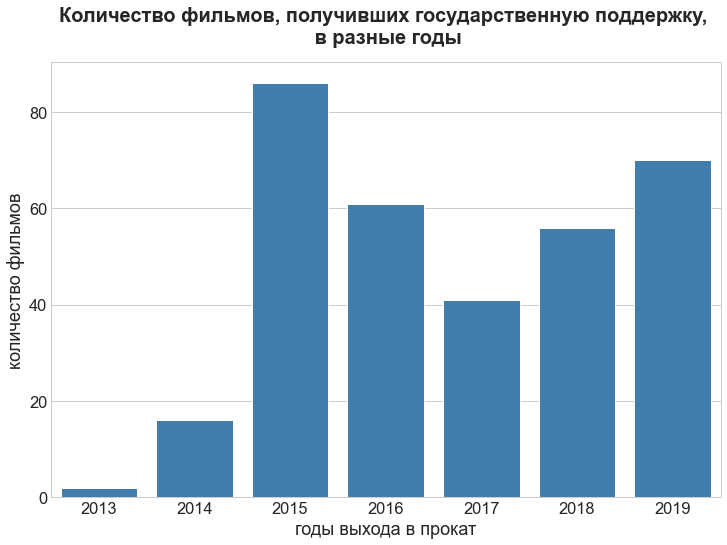

In [166]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')

df_plot = state_money.groupby('year', as_index=False).agg({'title':'count'})
sns.barplot(data=df_plot, x='year', y='title', color='#3080bd')
plt.title('Количество фильмов, получивших государственную поддержку, \n в разные годы', 
          fontweight='bold', fontsize=20, y=1.03)
plt.xlabel('годы выхода в прокат')
plt.ylabel('количество фильмов')

plt.show();

Наибольшее количество фильмов получило госуд.поддержку в 2015 году, затем был спад (похоже, "холодное лето 2017-го" задело и отечественную нишу). Далее был рост количества фильмов, получающих финансирование, однако он так и не восстановился до уровня 2015 года.

In [167]:
state_money['film_studio'].value_counts()

ООО "Студия анимационного кино "Мельница"                                    7
ООО "ТаББаК"                                                                 7
ООО "Кинокомпания "СТВ"                                                      6
ООО "ВИЗАРТ ФИЛЬМ"                                                           5
ООО "Нон-Стоп Продакшн"                                                      4
                                                                            ..
ООО "Киностудия "КУРЬЕР"                                                     1
ООО "Пролайн-Медиа", ТРЕМОРА, МАНУФАКТУР ПРОДАКШН                            1
ООО Кинокомпания "Аврора продакшнс" по заказу ООО "Фильмы навсегда медиа"    1
ООО Кинокомпания "Инвада Фильм", АО "ВБД Груп"                               1
АО "ТПО "Киностудия им. М.Горького"                                          1
Name: film_studio, Length: 258, dtype: int64

In [168]:
state_money['film_studio'].sort_values().unique()

array(['АНО "Интерфест", ООО "Пропеллер Продакшн"',
       'АНО "КиноДело продакшн"', 'АНО "Творческая студия "Стелла"',
       'АНО содействия развитию кинематографии "Ангел-Фильм", ООО "Кинокомпания Отражение"',
       'АО "Аэроплан"', 'АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"',
       'АО "Ленфильм"', 'АО "ТПО "Киностудия им. М.Горького"',
       'АО "ТПО "Киностудия им.М.Горького"',
       'Автономная некоммерческая организация "Творческая студия "Стелла"',
       'ЗАО "Аэроплан"', 'ЗАО "Дирекция кино"', 'ЗАО "МЕДИА-ТРЕСТ"',
       'ЗАО "Мотор фильм студия"',
       'ЗАО "ПРОДЮСЕРСКАЯ КОМПАНИЯ ВАЛЕРИЯ ТОДОРОВСКОГО"',
       'ЗАО "Студия "Ф.А.Ф.", ИКС-Фильме Креатив Пул ГмбХ (Х-Filme Creative Pool GmbH)',
       'Индивидуальный Предприниматель Шальопа А.Г.',
       'Компания Production Value WorldWide (ООО "ПРОДАКШН ВЭЛЬЮ ВОРЛД ВАЙД), ЧУК "КИНОКОМПАНИЯ СЕРГЕЯ БЕЗРУКОВА"',
       'Культурный фонд "Кино-телекомпания "Православная энциклопедия", ООО "Студия "РОЙ"',
       'НО Фонд Анд

Студии-производители разные, их много, и, на первый взгляд, повторов мало. Но если присмотреться, окажется, что в этом столбце много скрытых дубликатов.

Иногда они возникают по причине разной записи одного и того же, например:
- 'АО "ТПО "Киностудия им. М.Горького"',
- 'АО "ТПО "Киностудия им.М.Горького"' 
или
- 'НФ "Пример интонации  (Фонд Александра Сокурова)"',
- 'Некоммерческий фонд поддержки кинематографа "Пример интонации" (Фонд Александра Сокурова)',

или потому что одна и та же студия то выпускает фильм самостоятельно, то при участии других студий, и, соответственно, это разные записи и повторов не видно.

В данном случае это не является предметом исследования и углубляться в этот вопрос нет смысла.

In [169]:
state_money['main_director'].value_counts()

Р.Давлетьяров                         5
Д.Дьяченко                            4
С.Андреасян                           4
Н.Хомерики                            3
А.Котт                                3
                                     ..
А.Томашевский                         1
А.Михалков                            1
Н.Степанова при участии С.Иванова     1
Н.Бондарчук                           1
М.Бальчюнас (псевдоним М.Вайсберг)    1
Name: main_director, Length: 270, dtype: int64

Также и в данных о главных режиссёрах - большое разнообразие, и углубляться сюда отдельно нет смысла.

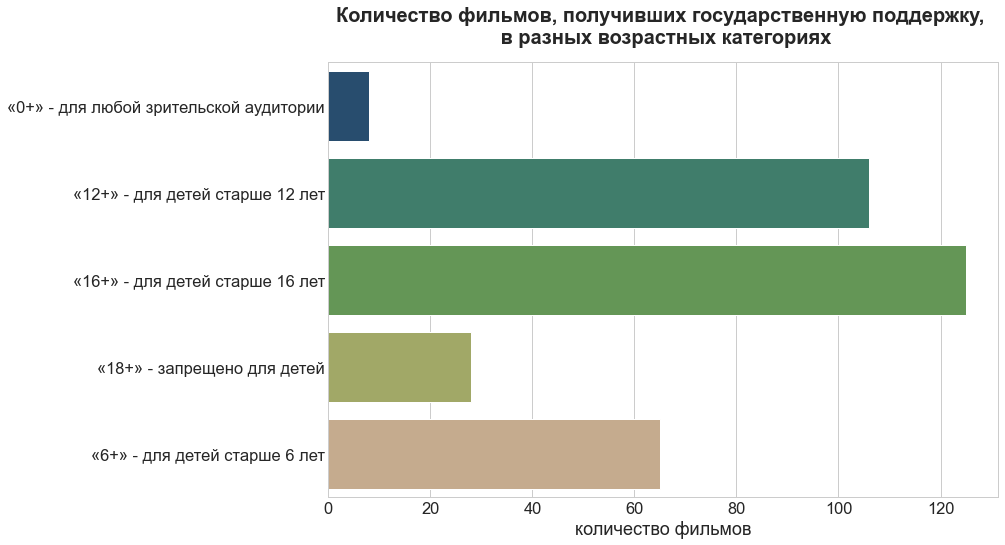

In [170]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
palette_color = sns.color_palette('gist_earth', 5)

df_plot = state_money.groupby('age_restriction', as_index=False).agg({'title':'count'})
sns.barplot(data=df_plot, x='title', y='age_restriction', palette=palette_color)
plt.title('Количество фильмов, получивших государственную поддержку, \n в разных возрастных категориях', 
          fontweight='bold', fontsize=20, y=1.03)
plt.xlabel('количество фильмов')
plt.ylabel('')

plt.show();

Государство чаще всего выделяет деньги на поддержку фильмов возрастной категории "16+" (более 120 фильмов), также часто выделяет группе "12+" (более 100 фильмов), а вот группе фильмов с возрастным ограничением "6+" финансирование выделяется реже (более 60 фильмов). И совсем не пользуется популярностью категория "18+" и "0+".

Получается, в сравнении с мировой тенденцией есть и совпадения, и различия:
- фильмы категорий "12+" и "16+" многочисленны и в мире, и в России
- в мире выходит много фильмов категории "18+", в то время как в России очень небольшое количество таких фильмов вышло при поддержке государства

Судя по возрастным категориям фильмов, которые чаще всего получали госуд.поддержку, государство нацеливает свои усилия в наибольшей степени на поддержку фильмов для школьников и подростков.

Ранее уже был проведён анализ соотношения объёмов бюджетов фильмов, получивших госуд.поддержку и объёмов возвратных и невозвратных средств:

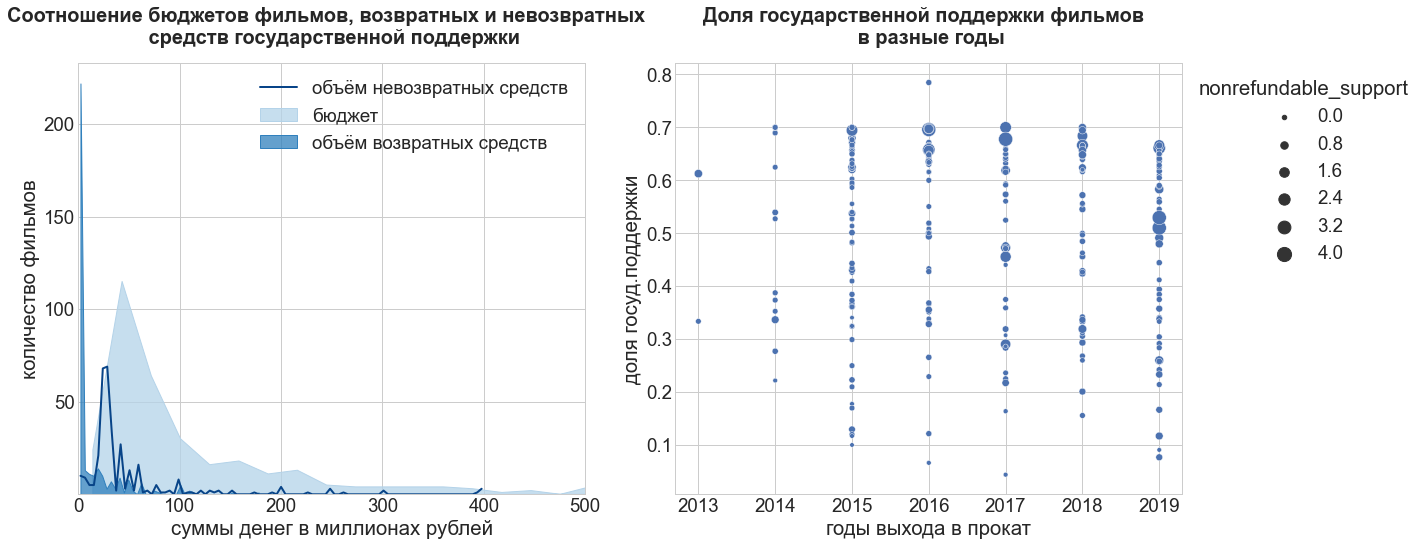

In [171]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.7)
plt.style.use('seaborn-whitegrid')

ax=plt.subplot(1, 2, 1)
ax=sns.histplot(data=state_money, x='budget', element="poly", label='бюджет', color='#b4d3e9')
sns.histplot(data=state_money, x='refundable_support', element="poly", label='объём возвратных средств', 
             color='#3080bd', ax=ax)
sns.histplot(data=state_money, x='nonrefundable_support', element="poly", fill=False, linewidth=2,
             label='объём невозвратных средств', color='#084488', ax=ax)
plt.title('Соотношение бюджетов фильмов, возвратных и невозвратных  \n средств государственной поддержки', 
          fontweight='bold', fontsize=20, y=1.03)
plt.legend()
plt.xlabel('суммы денег в миллионах рублей')
plt.ylabel('количество фильмов')
plt.xlim(0, 500000000)
ax.set_yticks([0,50,100, 150, 200])
ax.set_yticklabels(['', 50, 100, 150, 200])
ax.set_xticks([0, 100000000, 200000000, 300000000, 400000000, 500000000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

ax2=plt.subplot(1, 2, 2)
ax2=sns.scatterplot(data=state_money.query('ratio_state_budget != inf'), x='year', y='ratio_state_budget', 
                size='nonrefundable_support', sizes=(20, 200))
plt.title('Доля государственной поддержки фильмов  \n в разные годы', fontweight='bold', fontsize=20, y=1.03)
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('годы выхода в прокат')
plt.ylabel('доля госуд.поддержки')

plt.tight_layout()
plt.show();

**На первом графике мы видим**, что топовые значения у каждого параметра расположены в разных местах:
- **объёмы возвратных средств госуд.поддержки** чаще всего связаны с минимальными значениями (резко выделяющийся пик около 0),
- **объёмы невозвратных средств** чаще всего имеют значения около 25-40 млн,
- **бюджеты фильмов** более широко и плавно "размазаны" по графику, то есть у этого параметра более широкий диапазон различных значений, самый частый встречающийся вариант бюджета фильма в районе 40-50 млн
 
**На втором графике мы видим**, что чаще всего доля госуд.поддержки от общего бюджета фильма составляет около 60-70%, с годами есть тенденция к увеличению объёма невозвратных средств.

In [172]:
state_money['budget'].sum()

42240265939.0

In [173]:
state_money['refundable_support'].sum()

3939000000.0

In [174]:
state_money['nonrefundable_support'].sum()

16261688312.0

- общий **объём бюджетов** фильмов: **более 42 млрд.руб.** (если точнее: 42240265939 руб.)
- общий **объём возвратных средств** госуд.поддержки: **менее 4 млрд. руб** ( если точнее: 3939000000 руб.)
- общий **объём невозвратных средств** госуд.поддержки: **более 16 млрд.** (если точнее: 16261688312 руб.)

In [175]:
(state_money.pivot_table(index='financing_source', 
                         values=['budget', 'refundable_support', 'nonrefundable_support'], 
                         aggfunc='sum'))

,budget,nonrefundable_support,refundable_support
financing_source,,,
Министерство культуры,"11,469,203,758.00","4,836,661,000.00",0.00
"Министерство культуры, Фонд кино","2,626,309,609.00","859,931,354.00","325,500,000.00"
Фонд кино,"28,144,752,572.00","10,565,095,958.00","3,613,500,000.00"


In [176]:
state_money['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

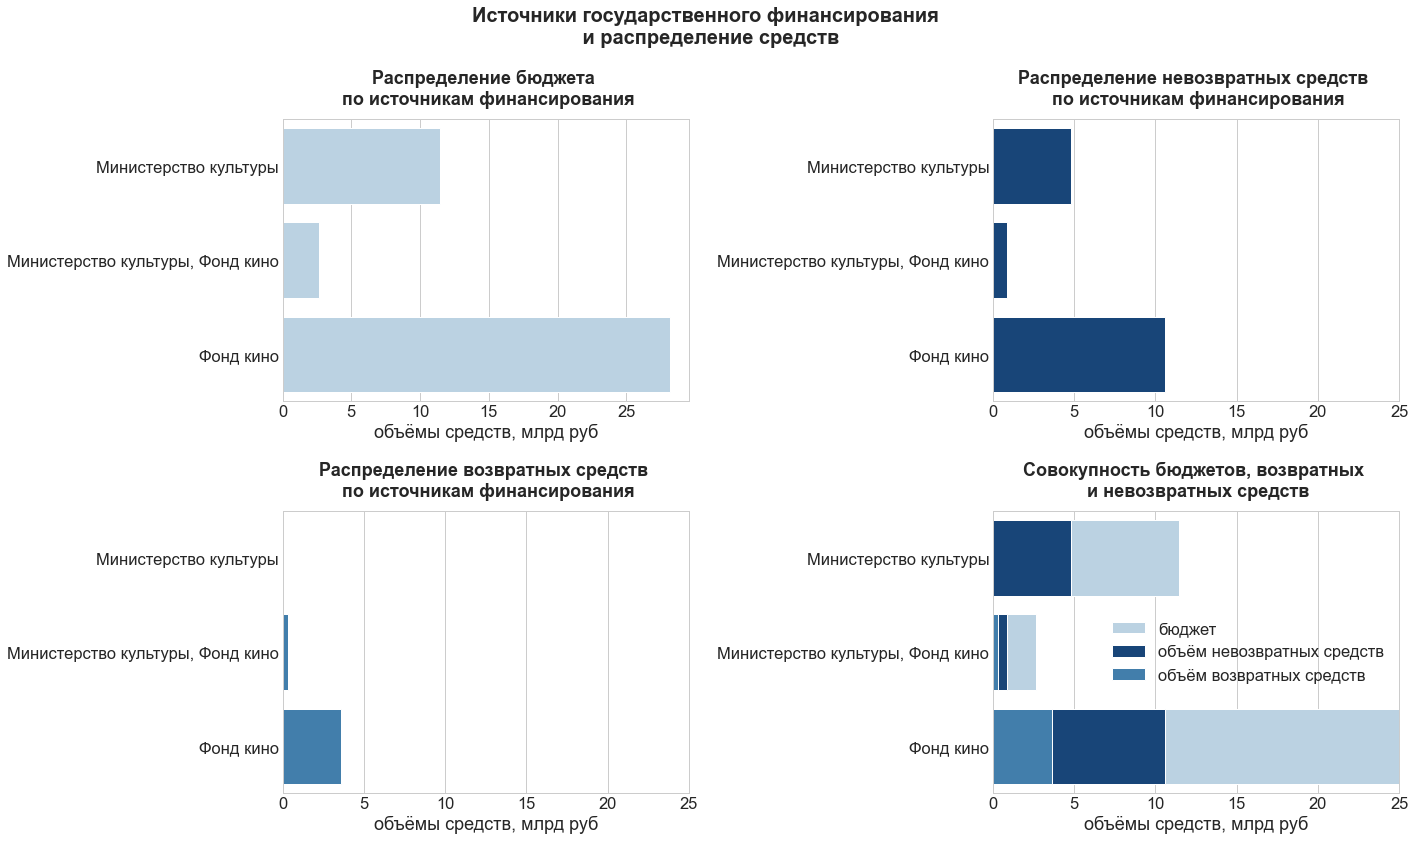

In [177]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
plt.suptitle('Источники государственного финансирования \n и распределение средств', 
          fontweight='bold', fontsize=20)

df_plot = (state_money.groupby('financing_source', as_index=False)
                      .agg({'budget':'sum', 'nonrefundable_support':'sum', 'refundable_support':'sum'}))

ax1=plt.subplot(2, 2, 1)
sns.barplot(data=df_plot, y='financing_source', x='budget', color='#b4d3e9')
plt.title('Распределение бюджета \n по источникам финансирования', 
          fontweight='bold', fontsize=18, y=1.03)
plt.ylabel('')
plt.xlabel('объёмы средств, млрд руб')
ax1.set_xticks([0, 5000000000, 10000000000, 15000000000, 20000000000, 25000000000])
ax1.set_xticklabels([0, 5, 10, 15, 20, 25])

ax2=plt.subplot(2, 2, 2, sharex=ax)
sns.barplot(data=df_plot, y='financing_source', x='nonrefundable_support', color='#084488')
plt.title('Распределение невозвратных средств \n по источникам финансирования', 
          fontweight='bold', fontsize=18, y=1.03)
plt.ylabel('')
plt.xlabel('объёмы средств, млрд руб')
ax.set_xticks([0, 5000000000, 10000000000, 15000000000, 20000000000, 25000000000])
ax.set_xticklabels([0, 5, 10, 15, 20, 25])

ax3=plt.subplot(2, 2, 3, sharex=ax)
sns.barplot(data=df_plot, y='financing_source', x='refundable_support', color='#3080bd')
plt.title('Распределение возвратных средств \n по источникам финансирования', 
          fontweight='bold', fontsize=18, y=1.03)
plt.ylabel('')
plt.xlabel('объёмы средств, млрд руб')
ax.set_xticks([0, 5000000000, 10000000000, 15000000000, 20000000000, 25000000000])
ax.set_xticklabels([0, 5, 10, 15, 20, 25])

ax4=plt.subplot(2, 2, 4, sharex=ax)
ax=sns.barplot(data=df_plot, y='financing_source', x='budget', color='#b4d3e9',
           label='бюджет')
sns.barplot(data=df_plot, y='financing_source', x='nonrefundable_support', color='#084488',
           label='объём невозвратных средств', ax=ax)
sns.barplot(data=df_plot, y='financing_source', x='refundable_support', color='#3080bd',
           label='объём возвратных средств', ax=ax)
plt.title('Совокупность бюджетов, возвратных \n и невозвратных средств', 
          fontweight='bold', fontsize=18, y=1.03)
plt.legend()
plt.ylabel('')
plt.xlabel('объёмы средств, млрд руб')
ax.set_xticks([0, 5000000000, 10000000000, 15000000000, 20000000000, 25000000000])
ax.set_xticklabels([0, 5, 10, 15, 20, 25])

plt.tight_layout()
plt.show();

Наряду с Министерством культуры финансовую поддержку оказывает Фонд кино:

https://ru.wikipedia.org/wiki/Фонд_кино
http://www.fond-kino.ru/

Министерство культуры, очевидно, не ставит своей целью возврат затраченных средств, а у Фонда кино другая позиция.

Вот что указано на официальном сайте Фонда кино в разделе цели:
- Основными целями Фонда являются поддержка отечественной кинематографии, повышение ее конкурентоспособности, обеспечение условий для создания качественных фильмов, соответствующих национальным интересам, популяризация национальных кинофильмов в Российской Федерации и за рубежом.

Насколько госуд.поддержка способствует повышению конкурентоспособности, можно судить по кассовым сборам (рассмотрим этот вопрос дальше), а что касается качества фильмов и отношения к ним зрителей, это можно оценить по рейтингам.

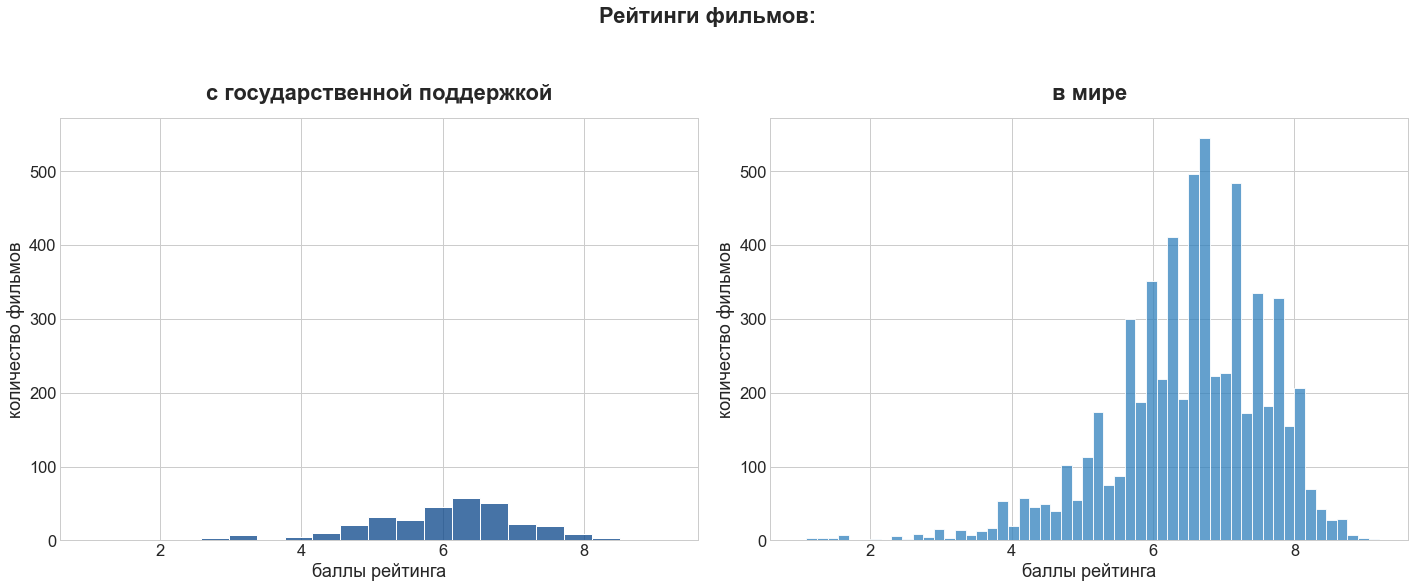

In [178]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
plt.suptitle('Рейтинги фильмов:', fontweight='bold', fontsize=22, y=1.03)
df_world = df.query('budget != budget')

ax=plt.subplot(1, 2, 1)
sns.histplot(data=state_money, x='ratings', color='#084488')
plt.xlabel('баллы рейтинга')
plt.ylabel('количество фильмов')
plt.title('с государственной поддержкой', fontweight='bold', fontsize=22, y=1.03)

ax2=plt.subplot(1, 2, 2, sharex=ax, sharey=ax)
sns.histplot(data=df_world, x='ratings', color='#3080bd')
plt.xlabel('баллы рейтинга')
plt.ylabel('количество фильмов')
plt.title('в мире', fontweight='bold', fontsize=22, y=1.03)


plt.tight_layout()
plt.show();

Рейтинги отечественных фильмов с госуд.поддержкой чаще всего имеют рейтинг в диапазоне примерно от 5.8 до 6.8 баллов, в то время как рейтинги всех остальных фильмов чаще всего имеют рейтинг в диапазоне от 5.8 до 7.8. То есть отечественные фильмы с госуд.поддержкой намного реже получают оценки более 7 баллов, в то время как у остальных фильмов практически так же много оценок в диапазоне 7-8 баллов, как и в диапазоне 6-7. Получается, в целом фильмы с госуд.поддержкой уступают по рейтингам другим фильмам.

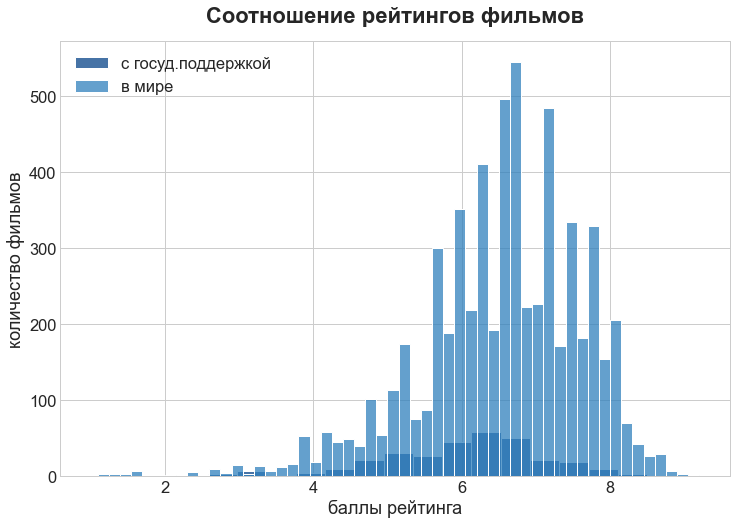

In [179]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')

ax=sns.histplot(data=state_money, x='ratings', label='с госуд.поддержкой', color='#084488')
sns.histplot(data=df_world, x='ratings', ax=ax, label='в мире', color='#3080bd')
plt.legend()
plt.xlabel('баллы рейтинга')
plt.ylabel('количество фильмов')
plt.title('Соотношение рейтингов фильмов', fontweight='bold', fontsize=22, y=1.03)

plt.show();

На общем графике видно, что пиковые зоны находятся в разных местах: у отечественных фильмов с госуд.поддержкой в диапазоне 6-7 баллов, в остальных - в диапазоне от 6 до 8 баллов. Кроме того, у отечественных фильмов с госуд.поддержкой максимальные оценки не доходят до 9 баллов, а у остальных фильмов - есть небольшое количество таких оценок.

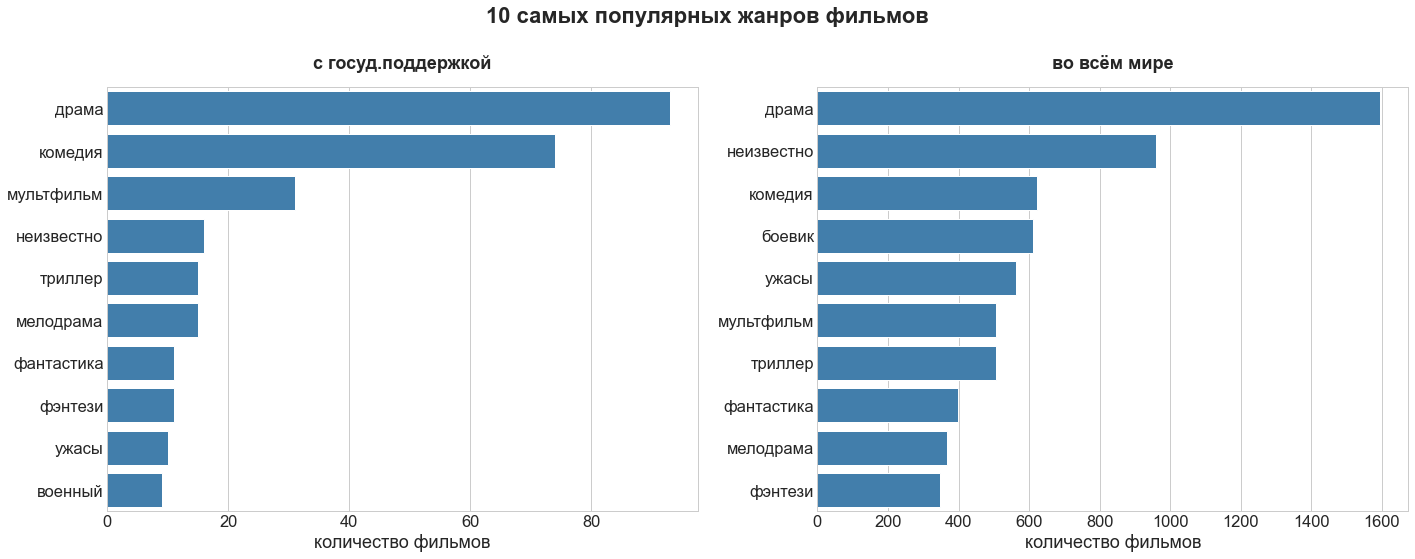

In [180]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
plt.suptitle('10 самых популярных жанров фильмов', fontweight='bold', fontsize=22)

state_money_plot = (state_money.groupby('main_genre', as_index=False)
                               .agg({'title':'count'})
                               .sort_values(by='title', ascending=False)
                               .head(10))
df_world_plot = (df_world.groupby('main_genre', as_index=False)
                               .agg({'title':'count'})
                               .sort_values(by='title', ascending=False)
                               .head(10))


ax=plt.subplot(1, 2, 1)
plt.title('с госуд.поддержкой', fontweight='bold', fontsize=18, y=1.03)
sns.barplot(data=state_money_plot, y='main_genre', x='title', color='#3080bd')
plt.ylabel('')
plt.xlabel('количество фильмов')

ax2=plt.subplot(1, 2, 2)
plt.title('во всём мире', fontweight='bold', fontsize=18, y=1.03)
sns.barplot(data=df_world_plot, y='main_genre', x='title', color='#3080bd')
plt.ylabel('')
plt.xlabel('количество фильмов')

plt.tight_layout()
plt.show();

Если сравнить главные жанры отечеств.фильмов с госуд.поддержкой и остальных фильмов во всём мире, то мы увидим:
- драма - наиболее распространённый жанр и в той, и в другой категории
- комедия - следующий по популярности жанр, но среди отечеств.фильмов она не так сильно уступает по популярности драме, как в ситуации с фильмами во всём мире (там комедий меньше более чем в 2 раза)
- далее в рейтингах жанры отличаются местами, и ещё, например, в "отечественном" рейтинге 10 самых популярных жанров нет боевиков, а в "мировых" рейтингах нет такого жанра как военный.

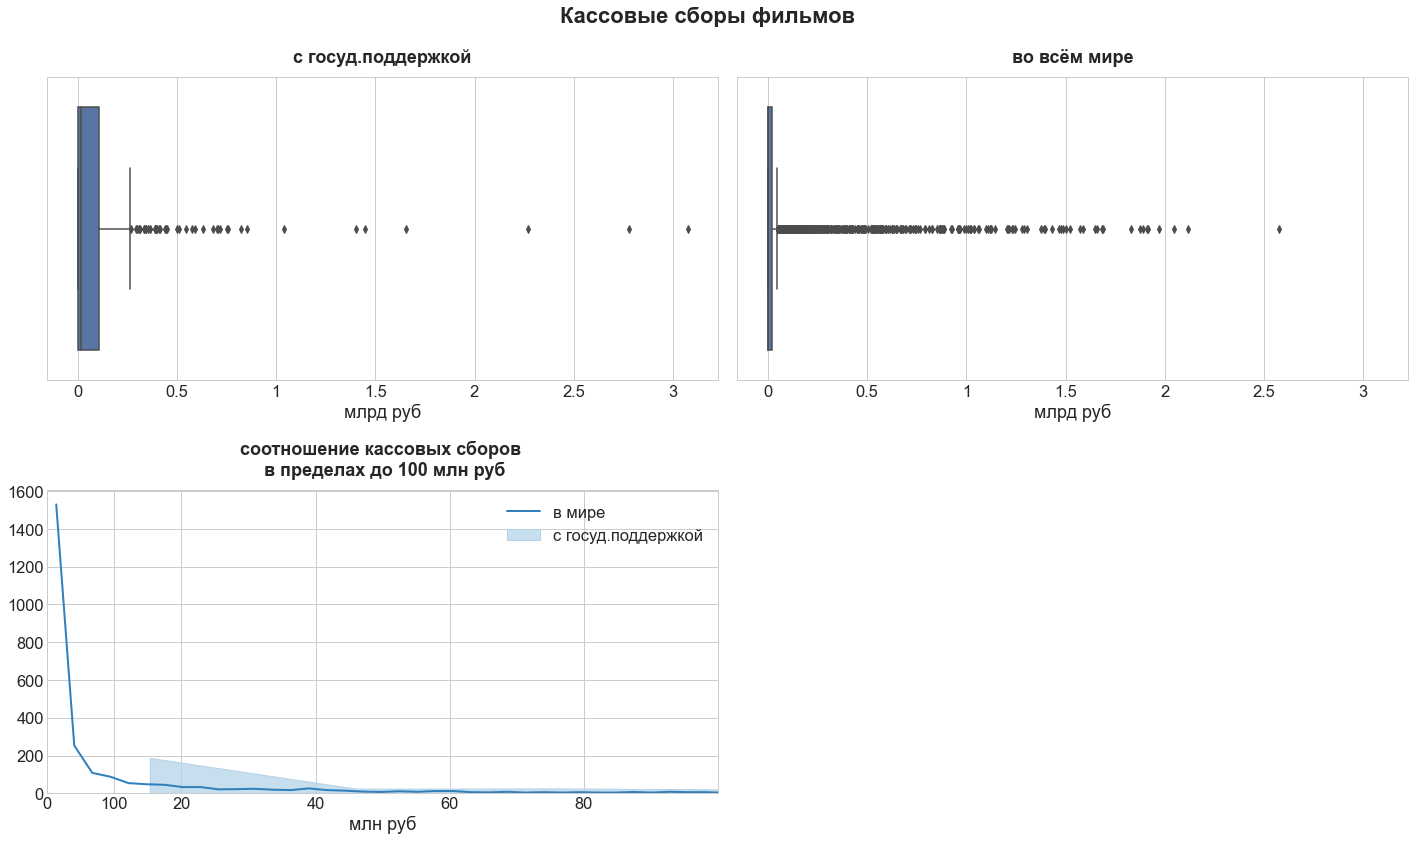

In [181]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
plt.suptitle('Кассовые сборы фильмов', fontweight='bold', fontsize=22)

ax=plt.subplot(2, 2, 1)
plt.title('с госуд.поддержкой', fontweight='bold', fontsize=18, y=1.03)
sns.boxplot(data=state_money, x='box_office')
plt.ylabel('')
plt.xlabel('млрд руб')
ax.set_xticks([0, 500000000, 1000000000, 1500000000, 2000000000, 2500000000, 3000000000])
ax.set_xticklabels([0, 0.5, 1, 1.5, 2, 2.5, 3])

ax2=plt.subplot(2, 2, 2, sharex=ax)
plt.title('во всём мире', fontweight='bold', fontsize=18, y=1.03)
sns.boxplot(data=df_world, x='box_office')
plt.ylabel('')
plt.xlabel('млрд руб')

ax3=plt.subplot(2, 2, 3)
plt.title('соотношение кассовых сборов \n в пределах до 100 млн руб', fontweight='bold', fontsize=18, y=1.03)
sns.histplot(data=state_money, x='box_office', element="poly", label='с госуд.поддержкой',color='#b4d3e9')
sns.histplot(data=df_world, x='box_office', element="poly", fill=False, linewidth=2, 
             label='в мире', color='#3080bd')
plt.legend()
plt.ylabel('')
plt.xlabel('млн руб')
plt.xlim(0, 100000000)
ax3.set_xticks([0, 20000000, 40000000, 60000000, 80000000, 10000000])
ax3.set_xticklabels([0, 20, 40, 60, 80, 100])

plt.tight_layout()
plt.show();

В целом соотношение кассовых сборов отечеств.фильмов с госуд.поддержкой и остальных фильмов в мире выглядит похожим: большинство фильмов имеют сумму сборов до 200 млн.руб. Фильмов с бОльшими сборами немного, в диапазоне от 500 млн.руб. до 1.5 млрд. чаще встречаются фильмы зарубежного производства, но, что важно отметить, что отечественные фильмы с госуд.поддержкой имеют сборы более 2.5 млрд.руб., в то время как зарубежные фильмы таких сборов в России не имеют. 

Это значит, отечественный зритель может отдавать предпочтение отечественному кино. Самые большие кассовые сборы (3 млрд, 2.8 млрд.) имеют именно отечественные фильмы. Но здесь есть интересный нюанс: если зритель готов "голосовать рублём", то это не значит, что он голосовать так же и в виде высокого балла на КиноПоиске. Из 5 фильмов с самыми высокими сборами наивысший балл имеет фильм производства США (7.6), а фильмы, обогнавшие его по сборам имеют баллы ниже (7.5 и 6.8). То есть косвенно здесь подтверждается закономерность, что зритель оценивает зарубежные фильмы более высоким баллом.

In [182]:
df.query('box_office >= 1000000000').sort_values('box_office', ascending=False).head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,ratio_state_budget
7456,Холоп,"111,021,719.00",2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00","35,000,000.00","160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79",2019,К.Шипенко,комедия,0.38
5653,Движение вверх,"111,011,817.00",2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00",2017,А.Мегердичев,спорт,0.68
6820,Мстители: Финал,"121,005,519.00",2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,7.60,"фантастика,боевик,драма","2,576,613,776.83",2019,Джо Руссо,фантастика,NaN
6549,Т-34,"111,024,918.00",2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,"60,000,000.00","120,000,000.00","563,784,717.00",Фонд кино,6.50,"драма,военный,боевик","2,271,754,004.52",2018,А.Сидоров,драма,0.32
3488,Пираты Карибского моря: Мертвецы не рассказыва...,"121,009,217.00",2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,неизвестно,6.60,"фэнтези,боевик,комедия","2,118,396,119.00",2017,Йоаким Реннинг,фэнтези,NaN


О чём ещё может рассказать 'box_office'? Об окупаемости фильмов. Если сборы превышают бюджет, то фильм окупает расходы, связанные с его производством. Но нас интресует в первую очередь госуд.поддержка. Поэтому мы ещё посмотрим, окупается ли сумма возвратных и невозвратных средств госуд.поддержки.

In [183]:
len(state_money.query('box_office > budget')) / len(state_money)

0.25

In [184]:
len(state_money.query('box_office > (refundable_support + nonrefundable_support)')) / len(state_money)

0.35542168674698793

Из отечественных фильмов, получивших госуд.финансирование, фактически 25% окупают свой бюджет и 35.5% окупают вложенные в них госуд.средства. Но вот что непонятно: даже у фильмов, собравших миллиарды в прокате, есть невозвратные средства госуд.поддержки. Если рассмотреть те же строки с фильмами, которые собрали наибольшие кассовые сборы (более 2 млрд.руб.), мы увидим и 35 млн, и 400 млн, и 120 млн. невозвратных средств, в то время как объём возвратных составляет 25 млн., 0,  и 60 млн.

Получается, даже миллиардные сборы в прокате не гарантируют возврата вложенных бюджетных средств. Это, с одной стороны, предсказуемо: финансирование на производство фильма поступает до того, как фильм выходит в прокат и собирает свою сумму сборов (которую заранее невозможно предсказать). Но, с другой стороны, такая ситуация вызывает вопросы об эффективности такого распоряжения деньгами налогоплательщиков.

In [185]:
len(state_money.query('refundable_support > nonrefundable_support')) / len(state_money)

0.07228915662650602

In [186]:
len(state_money.query('refundable_support < nonrefundable_support')) / len(state_money)

0.8885542168674698

In [187]:
len(state_money.query('refundable_support == nonrefundable_support')) / len(state_money)

0.0391566265060241

Доля фильмов, объём возвратных средств госуд.поддержки которых превышает объём невозвратных средств: 7.23%.
Доля фильмов, объём возвратных средств госуд.поддержки которых не превышает объём невозвратных средств: 88.86%.
Доля фильмов, объём возвратных средств госуд.поддержки которых равен объёму невозвратных средств: 3.92%.

Вывод: в основной массе случаев вложение госуд.средств не окупается, исключение составляют 7.23% фильмов.

Рассмотрим случаи, когда фильм с точки зрения вложенных госуд.средств окупается (вот эти 7.23% фильмов).

In [188]:
len(state_money.query('refundable_support > nonrefundable_support'))

24

In [189]:
len(state_money.query('refundable_support > nonrefundable_support and budget < box_office'))

10

In [190]:
len(state_money.query('refundable_support > nonrefundable_support and budget > box_office'))

14

In [191]:
len(state_money.query('refundable_support > nonrefundable_support and budget < box_office')) / len(state_money)

0.030120481927710843

In [192]:
len(state_money.query('refundable_support > nonrefundable_support and budget > box_office')) / len(state_money)

0.04216867469879518

24 фильма имеют объём возвратных средств больший, чем объём невозвратных (то есть с точки зрения госуд.вложений они окупились). При этом 10 из них действительно окупились в прокате (бюджет меньше кассовых сборов), а 14 фактически не окупились (бюджет превышает кассовые сборы), то есть они вернули часть вложенных в них госуд.средств в ущерб себе. 

То есть доля настоящего успешного сотрудничества (то есть такого сотрудничества, которое оказалось выгодным и для государства, и для производителей фильмов) ещё меньше: всего 3%.

Теперь рассмотрим случаи, когда фильм с точки зрения вложенных госуд.средств не окупается.

In [193]:
len(state_money.query('refundable_support < nonrefundable_support and budget < box_office'))

67

In [194]:
len(state_money.query('refundable_support < nonrefundable_support and budget > box_office'))

214

In [195]:
len(state_money.query('refundable_support < nonrefundable_support and budget < box_office')) / len(state_money)

0.20180722891566266

In [196]:
len(state_money.query('refundable_support < nonrefundable_support and budget > box_office'))  / len(state_money)

0.6445783132530121

67 фильмов фактически окупились в прокате (кассовые сборы превышают бюджет, но объём невозвратных средств превышает объём возвратных (т.е. с точки зрения госуд.вложений эти фильмы не окупились).

214 фильмов не окупились ни фактически (кассовые сборы меньше бюджета), ни с точки зрения госуд.вложений (объём невозвратных средств превышает объём возвратных).

Вывод:
- в 3.01% случаев история сотрудничества производителей фильмов и государства была успешной и для одной, и для другой стороны
- в 4.22% случаев государство выиграло от сотрудничества, а производитель фильмов поработал в ущерб себе
- в 20.18% случаев государство от сотрудничества проиграло, но производитель фильма окупил свой бюджет
- в 64.46% случаев от сотрудничества финансово не выиграла ни одна из сторон

## Общий вывод

**В процессе ознакомления и предобработки** данных были **произведены следующие изменения**:
- в столбце с данными о номерах прокатных удостоверений все записи переведены в числовой формат. Было найдено значение "нет", и оно было заменено на пропуск.
- данные в столбце 'show_start_date' преобразованы в тип данных datetime
- в столбцы с нечисловыми данными вместо пропусков проставлены значения-заглушки
- данные в столбце 'ratings' переведены в числовой формат
- при работе со столбцом 'ratings' были обнаружены 29 строк с необычным форматом записи баллов (вместо средней оценки, например, "6.7", запись в виде процента, например, "98%"). При дополнительной проверке было найдено несоответсвие этих записей и рейтинга на КиноПоиске, и значения в этих строках были изменены на пропуски.
- в столбце 'puNumber' были найдены два дубликата (чего быть не должно). Была произведена проверка, и дубликаты были исправлены: у строки с индексом **4638** номер прокатного удостоверния был исправлен на "221154**2**10", а у строки с индексом **5068** номер удостоверения был исправлен на "221054**3**10".
- в столбце 'title' были убраны лишние символы по краям записей (точки, нижние подчёркивания, дефисы, пробелы)
- в столбцах 'type', 'film_studio', 'production_country', 'director', 'producer' тоже были убраны лишние символы по краям строк (пробелы)
- в строке с индексом 7247 в столбце 'production_country' была найдена и заменена опечатка (вместо 2019 - Германия)

**В процессе изучения данных** возникли следующие **вопросы** и были замечены следующие **странные моменты**:
- у 17 фильмов бюджет 0 рублей
- у трёх разных фильмов, выпущенных в разные годы, идентичный бюджет вплоть до 7 рублей (37142857 руб.), при этом точно такой же абсолютно идентичный объём невозвратных средств (26 млн.руб.), идентичный объём возвратных средств (0 руб.), но кассовые сборы в рублях при этом отличаются (это строки с индексами 1448, 2379, 2899)
- есть и ещё подобные строки с идентичными бюджетами и объёмами невозвратных средств, которые могут вызывать вопросы (точно ли все данные указывались верно, такие точные совпадения кажутся странными)
- в столбце 'production_country' обнаружена проблема: названия стран в разных строках разделены между собой по-разному (это помешало бы проводить, например, анализ международного сотрудничества в сфере производства фильмов)
- в столбец с номерами прокатных удостоверений закралось одно подозрительное значение - **1811096** у строки с индексом **4701**. Это единственное 7-значное число среди 9-значных (вероятно, опечатка).
- в столбце с данными об объёме возвратных средств госуд.поддержки есть два значения, выделяющихся на общем фоне: все остальные значения представлены в виде "круглой" суммы, а эти два значения подсчитаны подробно вплоть до десятков и единиц (строки с индексами 2538, 3782)
- подобная ситуация в столбце с данными об объёмах невозвратных средств: среди преимущественно "круглых" цифр иногда встречаются досконально просчитанные значения. Также "пёстроту" записей можно встретить и в столбце 'budget'. Это говорит о том, что, кажется, нет единой модели заполнения финансовых сведений.
- в столбце 'box_office' есть неожиданно маленькие значения (40, 50 руб. и т.д.). Для качественного анализа хотелось бы ясно представлять природу получения таких данных.
- если посмотреть на соотношение данных из столбца 'budget', то мы увидим странную картину: в некоторых случаях бюджет фильма меньше объёмов возвратных или невозвратных средств госуд.поддержки (в 10 и 16 случаях соответственно). Это связано с нулями в графе бюджет у 17 фильмов (и это ещё раз вызывает вопросы по поводу сокрытия таких данных).

**Вывод**: предоставленные данные имеют различные "шероховатости" в виде опечаток, заполнения информации в одном столбце разными способами, лишних символов, а есть моменты, которые и вовсе выглядят подозрительными (например, 0 бюджеты фильмов). Также есть вопросы к сбору данных (как именно появляются данные о сборах, что значат минимальные значения в этом столбце). Всё это осложняет качественный анализ предоставленных данных.

**ИЗУЧЕНИЕ РЫНКА РОССИЙСКОГО КИНОПРОКАТА, ВЫЯВЛЕНИЕ ТЕКУЩИХ ТРЕНДОВ:**

Сразу стоит отметить, что доля фильмов с указанной информацией о прокате в кинотеатрах небольшая: 42.19%. 

**Динамика проката (количество фильмов)** выглядит следующим образом:
- начиная с **2010 года (105 фильмов, это минимальное значение)** количество фильмов постоянно увеличивалось, причём этот рост усиливался год от года до 2015 года включительно
- в 2016 году был первый пик значений (526 фильмов)
- далее в 2017 году был спад и снова рост 
- в **2019 году зафиксировано наибольшее количество фильмов в прокате: 530**.

**Таким образом**, с 2010 до 2019 года в целом наблюдается явная **тенденция увеличения количества фильмов в прокате** год от года. Рост не всегда происходит одинаково, иногда быстрее (2013-2016), иногда медленнее (2010-2012), и однажды случился достаточно ощутимый спад количества фильмов (в 2017), однако общая тенденция к увеличению количества фильмов в прокате сохранилась. 

По мнению специалистов, 2017 год был тяжёлым для киноиндустрии по ряду причин:
1. Снижение интереса зрителей к просмотру кино в кинотеатрах
2. Переизбыток продолжений (неоправданно высокие ожидания от сиквелов)
3. Высокая конкуренция между фильмами и сериалами
4. Кроме сериалов стрим-сервисы стали предлагать зрителям собственный киноконтент.

Что касается **суммы кассовых сборов** в каждом году, то здесь **общая тенденция**, с одной стороны, напоминает тенденцию  **роста значений от 2010 к 2019 году**, как это было в ситуации с подсчётом количества фильмов, вышедших в прокат в каждом году. Но, с другой стороны, **характер этого роста иной**: можно сказать, он носит **"взрывной"** характер:
- в 2010-2013 годах суммы сборов измерялись в миллионах рублей, а начиная с 2014 - в миллиардах;
- 2014 год, можно сказать, был переходным (от исчилений в миллионах (2013г. - 29 млн) перешли к миллиардам (2014г. - 7.4 млрд); - в 2015 году сумма сборов резко увеличилась (от 7.4 млрд. до 39.5 млрд.);
- 2016-2019 года показывают похожие суммы сборов, с небольшими колебаниями (47-49 млрд.)
- **минимальная сумма сборов** в 2010 году:	2 428 654 руб.
- **максимальная сумма сборов** в 2018 году: 49 668 403 134 руб.

Между **средней суммой сборов и медианной есть очень большой разрыв**. Средняя сумма существенно выше медианной, это возникает потому, что **есть много фильмов, кассовые сборы которых значительно больше предполагаемой "нормы"**.
На графике видно, как много выбивающихся значений присутствует в данных с 2014 года. Если верхней границы нормы является значение примерно в диапазоне 100 - 200 млн в зависимости от года, то есть масса фильмов, кассовые сборы которых выше этой нормы и чьи сборы превышают и 500 млн, и 1 млрд, и есть даже суммы в районе 2, 2.5 и 3 миллиардов. **Настолько большие и часто встречающиеся значения и оказывают влияние на разницу между средней суммой и медианой**.

Вероятно, такой "взрывной" рост связан со спецификой собранных данных, с небольшой долей фильмов с указанной информацией о прокате.
И, кстати, если количество фильмов было максимальным в 2019 году, то сумма сборов всё-таки - в 2018. Возможно, это говорит о том, что "классический" поход в кинотеатр стал всё-таки немного проигрывать стриминговым сервисам и сериалам, которые зритель может смотреть у себя дома.

Что касается того, фильмы каких **возрастных категорий** наиболее финансово успешны:
- в период с 2015 по 2019 год **фильмы с возрастным ограничением "16+" и "12+" собрали наибольшие суммы в прокате** (76 и 60.6 млрд. соответственно). Также значительную сумму соборов собрали фильмы **"6+"** (55.8 млрд.).
- чуть меньше собрали фильмы "18+" (40 млрд.)
- меньше всего составила сумма кассовых сборов фильмов с возрастным ограничением "0+" (809 млн.)

Кроме того, данные говорят о том, что потенциальному инвестору в первую очередь стоит обращать внимание на фильмы с возрастным ограничением "6+" (у них наиболее высокие среднее и медианное значения).

**Изменение количества фильмов в каждой возрастной категории по годам:** 
- во-первых, фильмов категории "18+" выпущено в прокат много, а сборов они приносят неожиданно мало для такого количества
- в категории фильмов "12+" заметное снижение количества фильмов в 2017 году отразилось на сумме кассовых сборов: они тоже "упали"
- а вот в категории фильмов "16+" противоположная ситуация: количество фильмов в прокате в 2017 тоже было меньшим по сравнению с другими годами, но сумма сборов, наоборот, оказалась самой большой
- в категории фильмов "6+" уменьшение количества фильмов в прокате в 2017 году тоже не сказалось на сумме сборов - она была достаточно высокой.

Можно выделить **два главных фактора, влияющих на сумму сборов** в той или иной **возрастной категории**:
- количество выпущенных фильмов в этой категории
- фильмы со сборами более 1 млрд. руб.

Всего таких фильмов, собравших в прокате миллиардные суммы, не так уж много: 55. 

**Как менялось количество фильмов с более чем миллиардными сборами в каждой возрастной категории с течением лет**:
- отдельно заметим, что категории "0+" вообще не присутствует
- наибольшее количество "фильмов-миллиардеров" в категории "12+", и оно неравномерно распределяется по годам (от 1 до 5 фильмов в каждом отдельно взятом году). Есть общая тенденция роста с падением значений в 2017 году.
- в категории "16+" наблюдается плавный рост и падение значений: от 1 фильма в 2015 году до 4 фильмов в 2017 и 2 фильмов в 2019 году
- в категории "18+" наблюдается уверенный рост: в 2015-2017 годах выходило по 1 фильму с подобным размером сборов, в 2018 году уже 2 фильма и в 2019 году 3 фильма
- в категории "6+" тоже наблюдается тенденция увеличения количества фильмов, собирающих миллиардные сборы, от 2 таких фильмов в 2015 году к 4 фильмам в 2019 году, но есть и посреди этой общей тенденции выбивающийся, наименее удачный 2018 год - всего 1 фильм смог собрать более 1 млрд.руб.

**Как менялась сумма сборов фильмов в каждой возрастной категории с течением лет:**
- во-первых, **категория фильмов "0+"** постепенно по сумме кассовых сборов "сошла на нет" (на первом графике сборов за 2018 и 2019 даже не видно). Хотя количество таких фильмов наоборот, даже увеличилось с годами.

- **фильмы с возрастным ограничением "12+"** в целом всегда были в тройке лидеров среди других возрастных категорий фильмов, исключение - 2017 год (тогда же и было наименьшее количество фильмов с миллиардными сборами). Интересно, что в 2015 году эта категория фильмов по сумме сборов была на первом месте, но потом уступила своё лидерство и более не смогла его вернуть, хотя количество фильмов с таким возрастным ограничением в 2018, 2019 годах было большим, чем в 2015 году.  

- **категория фильмов "16+"** в целом наиболее уверенно чувствует себя по сравнению с другими возрастными категориями фильмов. Ранее мы уже рассмотрели интересное несовпадение: максимальная сумма сборов в 2017 году при минимальном количестве выпущенных фильмов в этой категории. Это связано с большим, чем обычно, количеством фильмов, собравших сборы более миллиарда (и даже 2 млрд.руб.). В последующие годы кассовые сборы снижаются, а количество фильмов растёт. Видимо, для этой возрастной группы всё-таки в конкуретной борьбе более привлекательными становятся онлайн-платформы/стриминги/интернет, а не поход в кинотеатр. 

- **категория фильмов "18+"** по суммам сборов отстаёт от других возрастных категорий. И это отставание заметно во все годы, чего нельзя сказать о количестве выпущенных фильмов в этой категории. По количеству выпущенных фильмов категория "18+" как раз часто находится на высоких позициях (чаще всего это 2-е место среди других категорий фильмов). Получается, в сегменте "18+" есть большое разнообразие, но спрос в целом не отвечает взаимностью предложению. Например, сумма сборов в 2019 году увеличилась, видимо, только по причине максимального количества фильмов в этой категории за все годы (более 250). Возможно, в этой возрастной категории наиболее сильно проявляется влияние масштабного развития онлайн-сервисов. Подробнее об этой "эре стриминговых сервисов" можно прочитать здесь:
https://www.forbes.ru/biznes/346707-era-kartochnogo-domika-kak-onlayn-kinoteatry-zavoevyvayut-serdca-i-umy-zriteley

- **фильмы с возрастным ограничением "6+"** показывают постепенный рост и в суммах сборов (со снижением в 2018 году), и в количестве таких фильмов (со снижением в 2017 году). Для этой возрастной категории ранее был найден важный момент: среднее и арифметическое и мединное значения для этой категории фильмов выше, чем у других. Другими словами, фильмов в разделе "6+" не так уж много, но экономически они показывают наиболее успешные результаты среди фильмов других возрастных категорий. Возможно, это связано с возрастом зрителей: в то время как взрослые и подростки чаще предпочитают смотреть интересующие их фильмы/сериалы дома, поход с ребёнком младшего школьного возраста в кинотеатр - это интересная и привлекательная форма досуга.

Дополнительно о возрастных ограничениях и о некоторых проблемах, с этим вопросом связанных, можно прочитать здесь:
https://www.kinopoisk.ru/media/article/3240260/
и здесь:
https://360tv-ru.turbopages.org/360tv.ru/s/news/tekst/otsejat-po-vozrastu/


В возрастной категории фильмов "0+" были обнаружены странные значения главных жанров: боевик, ужасы, триллер, криминал. Эти строки можно найти в переменной df_0_question.

У этих "подозрительных строк" есть одна общая закономерность в графе 'production_country'(из 8 фильмов : 5 произведены - в России, 2 - при участии СССР, и только один фильм полностью зарубежный). Эта небольшая случайно найденная закономерность косвенно подтверждает мнение, описанное в статье на КиноПоиске:

"Многие в кинобизнесе согласны с тем, что угадать, какое ограничение у фильма будет, заранее нельзя. Впрочем, есть тенденции к завышению рейтинга и к более либеральной оценке отечественных масштабных проектов. Таким образом, нечеткие критерии закона могут способствовать нечестной конкуренции.

Кирилл Сорокин, основатель Beat Film Festival:

— Существует проблема: критерии присвоения возрастного рейтинга более-менее непрозрачны. Мы можем взять некоторые национальные блокбастеры вроде «Легенды № 17», которые имеют низкие рейтинги и доступны детям, несмотря, например, на сцены насилия или эротики. Не хочется обязательно предполагать некий лоббизм, но по факту мы его и видим, хотя неизвестно, на каком этапе он возникает".
https://www.kinopoisk.ru/media/article/3240260/

Итак, и предоставленные данные, и мнения специалистов, найденные в свободном доступе в прессе, говорят о том, что есть много шероховатостей в вопросе определения категорий возрастных ограничений и их реализации на практике.

**ФИЛЬМЫ, ПОЛУЧИВШИЕ ГОСУДАРСТВЕННОЕ ФИНАНСИРОВАНИЕ:**

Таких фильмов 332.

Наибольшую долю среди фильмов, получивших госуд.поддержку, составляют фильмы, произведённые в самой России, и очень редко имеет место международное сотрудничество. Среди стран-партнёров замечены некоторые европейские страны, страны СНГ и Китай.

Наибольшее количество фильмов получило госуд.поддержку в 2015 году, затем был спад (похоже, "холодное лето 2017-го" задело и отечественную нишу). Далее был рост количества фильмов, получающих финансирование, однако он так и не восстановился до уровня 2015 года.

Студии-производители разные, их много, и, на первый взгляд, повторов мало. Но если присмотреться, окажется, что в этом столбце много скрытых дубликатов. Также и в данных о главных режиссёрах - большое разнообразие.

Государство чаще всего выделяет деньги на поддержку фильмов возрастной категории "16+" (более 120 фильмов), также часто выделяет группе "12+" (более 100 фильмов), а вот группе фильмов с возрастным ограничением "6+" финансирование выделяется реже (более 60 фильмов). И совсем не пользуется популярностью категория "18+" и "0+".

Получается, в сравнении с мировой тенденцией есть и совпадения, и различия:
- фильмы категорий "12+" и "16+" многочисленны и в мире, и в России
- в мире выходит много фильмов категории "18+", в то время как в России очень небольшое количество таких фильмов вышло при поддержке государства

Если сравнить главные жанры отечеств.фильмов с госуд.поддержкой и остальных фильмов во всём мире, то мы увидим:
- драма - наиболее распространённый жанр и в той, и в другой категории
- комедия - следующий по популярности жанр, но среди отечеств.фильмов она не так сильно уступает по популярности драме, как в ситуации с фильмами во всём мире (там комедий меньше более чем в 2 раза)
- далее в рейтингах жанры отличаются, например, в "отечественном" рейтинге 10 самых популярных жанров нет боевиков и документальных картин, а в "мировых" рейтингах нет таких жанров как военный, семейный.

Оценить, насколько отечественные фильмы с государственной поддержкой интересны зрителю, можно по двум параметрам: рейтинги и кассовые сборы.

**Рейтинги** отечественных фильмов с госуд.поддержкой чаще всего имеют значения в диапазоне примерно от 5.8 до 6.8 баллов, в то время как рейтинги всех остальных фильмов чаще всего имеют оценки в диапазоне от 5.8 до 7.8. То есть отечественные фильмы с госуд.поддержкой намного реже получают оценки более 7 баллов, в то время как у остальных фильмов практически так же много оценок в диапазоне 7-8 баллов, как и в диапазоне 6-7. Получается, в целом фильмы с госуд.поддержкой уступают по рейтингам другим фильмам.

Кроме того, у отечественных фильмов с госуд.поддержкой максимальные оценки не доходят до 9 баллов, а у остальных фильмов - есть небольшое количество таких оценок.

Что касается **финансовых данных**:
- **объёмы возвратных средств госуд.поддержки** чаще всего связаны с минимальными значениями (чаще всего 0),
- **объёмы невозвратных средств** чаще всего имеют значения около 25-40 млн (таких случаев достаточно много, но примерно в два раза меньше, чем нулевых значения возвратных средств),
- **бюджеты фильмов** имеют широкий диапазон различных значений, самый часто встречающийся вариант бюджета фильма в районе 40-50 млн,
- при значениях сумм от 200 млн.руб. преобладают сведения о бюджетах фильмов и невозвратных объёмов госуд.поддержки.

К этому можно добавить, что чаще всего доля госуд.поддержки от общего бюджета фильма составляет около 65-70%. Такие случаи чаще всего встречались в 2015, 2016 и 2019 годах.

- общий **объём бюджетов** фильмов: **более 42 млрд.руб.** (если точнее: 42240265939 руб.)
- общий **объём возвратных средств** госуд.поддержки: **менее 4 млрд. руб** ( если точнее: 3939000000 руб.)
- общий **объём невозвратных средств** госуд.поддержки: **более 16 млрд.** (если точнее: 16261688312 руб.)

В целом соотношение кассовых сборов отечеств.фильмов с госуд.поддержкой и остальных фильмов в мире выглядит похожим: большинство фильмов имеют сумму сборов до 200 млн.руб. Фильмов с бОльшими сборами немного, в диапазоне от 500 млн.руб. до 1.5 млрд. чаще встречаются фильмы зарубежного производства, но, что важно отметить, что отечественные фильмы с госуд.поддержкой имеют сборы более 2.5 млрд.руб., в то время как зарубежные фильмы таких сборов в России не имеют.

Это значит, отечественный зритель может отдавать предпочтение отечественному кино. Самые большие кассовые сборы (3 млрд, 2.8 млрд.) имеют именно отечественные фильмы. Но здесь есть интересный нюанс: если зритель готов "голосовать рублём", то это не значит, что он готов голосовать так же и в виде высокого балла на КиноПоиске. Из 5 фильмов с самыми высокими сборами наивысший балл имеет фильм производства США (7.6), а фильмы, обогнавшие его по сборам имеют баллы ниже (7.5 и 6.8). То есть косвенно здесь подтверждается закономерность, что зритель оценивает зарубежные фильмы более высоким баллом (и, видимо, считает их более качественными). 

Из отечественных фильмов, получивших госуд.финансирование, фактически 25% окупают свой бюджет и 35.5% окупают вложенные в них госуд.средства. 
Но даже миллиардные сборы в прокате не гарантируют возврата вложенных бюджетных средств. Это, с одной стороны, предсказуемо: финансирование на производство фильма поступает до того, как фильм выходит в прокат и собирает свою сумму сборов (которую заранее невозможно предсказать). Но, с другой стороны, такая ситуация вызывает вопросы об эффективности такого распоряжения деньгами налогоплательщиков.

- доля фильмов, объём возвратных средств госуд.поддержки которых превышает объём невозвратных средств: 7.23%. 
- доля фильмов, объём возвратных средств госуд.поддержки которых не превышает объём невозвратных средств: 88.86%. 
- доля фильмов, объём возвратных средств госуд.поддержки которых равен объёму невозвратных средств: 3.92%.

Вывод: в основной массе случаев вложение госуд.средств не окупается, исключение составляют 7.23% фильмов.

- в 3.01% случаев история сотрудничества производителей фильмов и государства была успешной и для одной, и для другой стороны
- в 4.22% случаев государство выиграло от сотрудничества, а производитель фильмов поработал в ущерб себе
- в 20.18% случаев государство от сотрудничества проиграло, но производитель фильма окупил свой бюджет
- в 64.46% случаев от сотрудничества финансово не выиграла ни одна из сторон

Возможно, нужна некоторая корректировка подхода к выделению и возврату госуд.средств; возможно, ответы на некоторые вопросы уже есть у профессионалов в области, нужно просто наладить контакт и прислушиваться к разным мнениям.